# **<span style = "color:darkblue;">Prediction of Price Movements in Market Microstructure</span>**

**<span style="color:red;">Note: model seems to work better with AAPL for now, test later again for AMZN</span>**


In [433]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
from mpl_toolkits.mplot3d import Axes3D

In [434]:
df_final = pd.read_csv('/Users/shpetimtafili/Desktop/Advanced Data Analysis/Project ADA/bid_ask_price_final.csv')


In [435]:
df_final

AAPL.O Timestamp  AAPL.O.1 Ask Close  AAPL.O.2 Ask Size  \
0     2024-05-14 16:30:00              187.03          3260600.0   
1     2024-05-14 16:25:00              186.98          3796300.0   
2     2024-05-14 16:20:00              186.73          2965500.0   
3     2024-05-14 16:15:00              186.80          3038800.0   
4     2024-05-14 16:10:00              186.98          4606600.0   
...                   ...                 ...                ...   
5997  2024-04-01 12:25:00              171.88             2100.0   
5998  2024-04-01 12:20:00              171.88              500.0   
5999  2024-04-01 12:15:00              171.88             1000.0   
6000                  NaN                 NaN                NaN   
6001                  NaN                 NaN                NaN   

      AAPL.O.3 Bid Close  AAPL.O.4 Bid Size  AAPL.O.5 Target Close  \
0                 187.00          3131800.0                    NaN   
1                 186.96          4298100.0               186.9600   
2                 186.72          3115000.0               186.7299   
3                 186.79          3403200.0               186.7966   
4                 186.97          5660300.0               186.9800   
...                  ...                ...                    ...   
5997              171.75             2000.0                    NaN   
5998              171.79              500.0                    NaN   
5999                 NaN                NaN                    NaN   
6000                 NaN                NaN                    NaN   
6001                 NaN                NaN                    NaN   

            ABT Timestamp  ABT.1 Ask Close  ABT.2 Ask Size  ABT.3 Bid Close  \
0     2024-05-14 16:45:00           104.47         38200.0           104.44   
1     2024-05-14 16:40:00           104.46        244200.0           104.43   
2     2024-05-14 16:35:00           104.49        163700.0           104.47   
3     2024-05-14 16:30:00           104.56        244200.0           104.53   
4     2024-05-14 16:25:00           104.54        226900.0           104.52   
...                   ...              ...             ...              ...   
5997  2024-03-14 11:35:00           121.14         39000.0              NaN   
5998  2024-03-14 11:30:00           121.20          4500.0              NaN   
5999  2024-03-14 11:25:00           121.20           900.0              NaN   
6000                  NaN              NaN             NaN              NaN   
6001                  NaN              NaN             NaN              NaN   

      ...  PG.2 Ask Size  PG.3 Bid Close PG.4 Bid Size  PG.5 Target Close  \
0     ...       149600.0          164.11      175800.0           164.1200   
1     ...       158500.0          164.23      325700.0           164.2301   
2     ...       162200.0          164.40      245900.0           164.4123   
3     ...       153500.0          164.39      241400.0           164.3989   
4     ...        97700.0          164.47      157000.0           164.4800   
...   ...            ...             ...           ...                ...   
5997  ...       365400.0             NaN           NaN                NaN   
5998  ...       271300.0             NaN           NaN                NaN   
5999  ...       302500.0             NaN           NaN                NaN   
6000  ...      5329700.0             NaN           NaN                NaN   
6001  ...            NaN             NaN           NaN                NaN   

         TSLA.O Timestamp  TSLA.O.1 Ask Close  TSLA.O.2 Ask Size  \
0     2024-05-14 17:45:00              178.30           851400.0   
1     2024-05-14 17:40:00              178.33          2707500.0   
2     2024-05-14 17:35:00              178.32          1808500.0   
3     2024-05-14 17:30:00              178.94          2275000.0   
4     2024-05-14 17:25:00              178.95          1940500.0   
...                   ...                 ...                ...   
5

In [436]:
# Create a dictionary to store each company's DataFrame
company_dataframes = {}

# List of company prefixes (modify as needed)
companies = ['AAPL.O', 'ABT', 'IBM', 'ADBE.O', 'BIIB', 'TTWO', 'COST', 'EBAY', 'INTC.O', 'NVDA.O', 'XOM', 'CVX', 'PG', 'TSLA.O']

# Extract and process data for each company
for company in companies:
    # Select columns related to the company
    company_columns = [col for col in df_final.columns if col.startswith(company)]
    company_df = df_final[company_columns].dropna()

    # Rename columns to remove the company prefix
    company_df.columns = [col.replace(f'{company}.', '') for col in company_df.columns]

    # Set the timestamp column as the index
    timestamp_col = f'{company} Timestamp'
    company_df = company_df.set_index(timestamp_col)

    # Sort the DataFrame by the timestamp column in ascending order
    company_df = company_df.sort_index(ascending=True).tail(3000)

    # Store the DataFrame in the dictionary
    company_dataframes[company] = company_df.astype(float)

# Store the sorted DataFrames in global variables (if needed)
for company in companies:
    globals()[f'df_{company.replace(".", "_").lower()}'] = company_dataframes[company]


In [437]:
for company in companies:
    globals()[f'df_{company.replace(".", "_").lower()}'] = company_dataframes[company]


In [438]:
df_aapl_o

1 Ask Close  2 Ask Size  3 Bid Close  4 Bid Size  \
AAPL.O Timestamp                                                        
2024-04-22 22:25:00       165.62     13200.0       165.59     19500.0   
2024-04-22 22:30:00       165.60     10600.0       165.59     11700.0   
2024-04-22 22:35:00       165.73     21100.0       165.68     30600.0   
2024-04-22 22:40:00       165.73     15300.0       165.71     22200.0   
2024-04-22 22:45:00       165.66     41500.0       165.54     30100.0   
...                          ...         ...          ...         ...   
2024-05-14 16:05:00       187.10   3395700.0       187.07   2998800.0   
2024-05-14 16:10:00       186.98   4606600.0       186.97   5660300.0   
2024-05-14 16:15:00       186.80   3038800.0       186.79   3403200.0   
2024-05-14 16:20:00       186.73   2965500.0       186.72   3115000.0   
2024-05-14 16:25:00       186.98   3796300.0       186.96   4298100.0   

                     5 Target Close  
AAPL.O Timestamp                     
2024-04-22 22:25:00        165.6050  
2024-04-22 22:30:00        165.6000  
2024-04-22 22:35:00        165.7000  
2024-04-22 22:40:00        165.7300  
2024-04-22 22:45:00        165.6000  
...                             ...  
2024-05-14 16:05:00        187.1000  
2024-05-14 16:10:00        186.9800  
2024-05-14 16:15:00        186.7966  
2024-05-14 16:20:00        186.7299  
2024-05-14 16:25:00        186.9600  

[3000 rows x 5 columns]

### **<span style="color:red;">Feature Selection / Feature Engineering</span>**
Several features will be selected to train the model.

- Bid-Ask Spread: $P_{\text{ask}} - P_{\text{bid}}$
  
- Smart Price: $P_{\text{smart}} = \frac{P_{\text{bid}} \cdot \frac{1}{V_{\text{ask}}} + P_{\text{ask}} \cdot \frac{1}{V_{\text{bid}}}}{\frac{1}{V_{\text{ask}}} + \frac{1}{V_{\text{bid}}}}$
  
- Midpoint Price: $P_{\text{midpoint}} = \frac{P_{\text{bid}} + P_{\text{ask}}}{2}$

- Bid-Ask Volume imbalance: $V_{\text{bid}} - V_{\text{ask}}$


In [439]:
def calculate_features(df):
    df_copy = df.copy()
    df_copy.loc[:, "Bid-Ask Spread"] = df_copy["1 Ask Close"] - df_copy["3 Bid Close"]
    df_copy.loc[:, "Smart Price"] = (
        (df_copy["3 Bid Close"] * (1 / df_copy["2 Ask Size"]) + df_copy["1 Ask Close"] * (1 / df_copy["4 Bid Size"])) /
        ((1 / df_copy["2 Ask Size"]) + (1 / df_copy["4 Bid Size"]))
    )
    df_copy.loc[:, "Midpoint Price"] = (df_copy["3 Bid Close"] + df_copy["1 Ask Close"]) / 2
    df_copy.loc[:, "Bid-Ask Volume Imbalance"] = df_copy["4 Bid Size"] - df_copy["2 Ask Size"]
    df_copy.loc[:, 'Target Close'] = df_copy['5 Target Close']

    # Selecting the relevant features
    df_features = df_copy[[
        "Bid-Ask Spread",
        "Smart Price",
        "Midpoint Price",
        "Bid-Ask Volume Imbalance",
        'Target Close'
    ]]
    
    return df_features

# Create a dictionary to store the feature DataFrames for each company
company_features = {}

# Loop through each company's DataFrame and calculate features
for company, df_company in company_dataframes.items():
    company_features[company] = calculate_features(df_company)

In [440]:
# Now we have all the companies needed
for company in companies:
    globals()[f'df_features_{company.replace(".", "_").lower()}'] = company_features[company]


In [441]:
df_features_aapl_o.tail()

Bid-Ask Spread  Smart Price  Midpoint Price  \
AAPL.O Timestamp                                                   
2024-05-14 16:05:00            0.03   187.085931         187.085   
2024-05-14 16:10:00            0.01   186.974487         186.975   
2024-05-14 16:15:00            0.01   186.794717         186.795   
2024-05-14 16:20:00            0.01   186.724877         186.725   
2024-05-14 16:25:00            0.02   186.969380         186.970   

                     Bid-Ask Volume Imbalance  Target Close  
AAPL.O Timestamp                                             
2024-05-14 16:05:00                 -396900.0      187.1000  
2024-05-14 16:10:00                 1053700.0      186.9800  
2024-05-14 16:15:00                  364400.0      186.7966  
2024-05-14 16:20:00                  149500.0      186.7299  
2024-05-14 16:25:00                  501800.0      186.9600

### **<span style="color:red;">Scaling in [0,1] and Selecting the data that will be used </span>**

In [442]:
from sklearn.preprocessing import MinMaxScaler

# Create a dictionary to store scaled dataframes
scaled_company_features = {}

# Loop through each company's feature dataframe and apply MinMax scaling
for company, df_features in company_features.items():
    # Create an instance of MinMaxScaler
    scaler = MinMaxScaler()

    # Create an empty DataFrame to hold the scaled data
    df_scaled = pd.DataFrame(index=df_features.index)

    # Loop through each column, scale it, and add it to the new DataFrame
    for column in df_features.columns:
        # Reshape data using df[column].values.reshape(-1, 1) because fit_transform expects a 2D array
        scaled_data = scaler.fit_transform(df_features[column].values.reshape(-1, 1))

        # Store the scaled column back into a DataFrame
        df_scaled[column] = scaled_data.flatten()  # Flatten to convert the 2D array back to 1D

    # Store the scaled DataFrame in the dictionary
    scaled_company_features[company] = df_scaled

# Now we have all the companies needed
for company in companies:
    globals()[f'df_scaled_{company.replace(".", "_").lower()}'] = scaled_company_features[company]


In [443]:
df_scaled_aapl_o.tail()

Bid-Ask Spread  Smart Price  Midpoint Price  \
AAPL.O Timestamp                                                   
2024-05-14 16:05:00        0.057692     0.959282        0.959215   
2024-05-14 16:10:00        0.019231     0.954428        0.954417   
2024-05-14 16:15:00        0.019231     0.946600        0.946565   
2024-05-14 16:20:00        0.019231     0.943558        0.943511   
2024-05-14 16:25:00        0.038462     0.954206        0.954198   

                     Bid-Ask Volume Imbalance  Target Close  
AAPL.O Timestamp                                             
2024-05-14 16:05:00                  0.554296      0.959878  
2024-05-14 16:10:00                  0.569179      0.954645  
2024-05-14 16:15:00                  0.562107      0.946646  
2024-05-14 16:20:00                  0.559902      0.943737  
2024-05-14 16:25:00                  0.563517      0.953772

### **<span style="color:red;">Reshaping the Data </span>**
We need to reshape the data to make the format suitable for RNNs. In machine learning and especially for RNNs dealing with time series data, it's common to reshape the data into segments (or windows) that represent sequences of consecutive data points. These sequences are what the RNN will use to learn the temporal dynamics of the data.

We need to choose a window size, this will depend on the specific use case and the nature of the time series data. Since my data is in 5 minutes intervals, I will choose a window size of 12 to capture the complexity of price movements within an hour.

So this means that the variable X will be 12 values large, and that the predicition will be y, the value coming just after the window.

The X data needs to be on a rolling basis, meaning we would have 12 values for row one, then all of the 11 most recent values of this row will constitute the 11 first values of the next row, the 12th value will be the new, most recent, value.



In [442]:
#########IGNORE NOT USEFUL FOR MULTIVARIATE 

# Function to reshape the data as explained previous cell, FOR UNIVARIATE, ONLY ONE FEATURE HERE 
def create_univariate_rnn_data(data, window_size):
    y = data[window_size:] # takes 13th value and above, meaning each value corresping to the next value of a 12 window values
    data = data.values.reshape(-1,1) # make it 2D from [1,2,3] to ([1], [2], [3] ) as a vector
    n = data.shape[0] # number of rows
    X = np.hstack(tuple([data[i: n-j, :] for i, j in enumerate(range(window_size, 0, -1))])) # stacks horizontally every window
    return pd.DataFrame(X, index=y.index), y


X,y = create_univariate_rnn_data(df_scaleds, window_size=72) # y should be the value following IMMEDIATLY each window --> VERIFIED!
#########IGNORE NOT USEFUL FOR MULTIVARIATE 

NameError: name 'df_scaleds' is not defined

In [444]:
# Reshaping for a multivariate prediction, targeting close price
def create_multivariate_rnn_data(data, target_column, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data.iloc[i:i + window_size].values)
        y.append(data[target_column].iloc[i + window_size])
    return np.array(X), np.array(y)

In [477]:
reshaped_data = {}

# List of company prefixes (modify as needed)
companies = ['aapl_o', 'abt', 'ibm', 'adbe_o', 'biib', 'ttwo', 'cost', 'ebay', 'intc_o', 'nvda_o', 'xom', 'cvx', 'pg', 'tsla_o']

# Define the window size
window_size = 12

# Create a function to reshape the data
def reshape_data(df, company):
    X, y = create_multivariate_rnn_data(df, "Target Close", window_size)
    return X, y

# Loop through each company's DataFrame and apply the function
for company in companies:
    df_scaled = globals()[f'df_scaled_{company}']  # Access the DataFrame by its name
    X, y = reshape_data(df_scaled, company)
    reshaped_data[company] = {'X': X, 'y': y}


In [478]:
from sklearn.model_selection import train_test_split

# Define the split ratio
split_ratio = 0.9

# Loop through each company's reshaped data and create training and testing sets
for company, data in reshaped_data.items():
    X = data['X']
    y = data['y']
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=split_ratio, shuffle=False)
    
    # Create dynamic variable names for training and testing sets
    company_key = company.replace(".", "_").lower()
    globals()[f'X_train_{company_key}'] = X_train
    globals()[f'X_test_{company_key}'] = X_test
    globals()[f'y_train_{company_key}'] = y_train
    globals()[f'y_test_{company_key}'] = y_test

# Access and print the shapes of training and testing data for a specific company (e.g., AAPL.O)
print(f'Shape of X_train for AAPL.O: {X_train_aapl_o.shape}')
print(f'Shape of X_test for AAPL.O: {X_test_aapl_o.shape}')
print(f'Shape of y_train for AAPL.O: {y_train_aapl_o.shape}')
print(f'Shape of y_test for AAPL.O: {y_test_aapl_o.shape}')

# Repeat for other companies as needed
print(f'Shape of X_train for ABT: {X_train_abt.shape}')
print(f'Shape of X_test for ABT: {X_test_abt.shape}')
print(f'Shape of y_train for ABT: {y_train_abt.shape}')
print(f'Shape of y_test for ABT: {y_test_abt.shape}')


Shape of X_train for AAPL.O: (2689, 12, 5)
Shape of X_test for AAPL.O: (299, 12, 5)
Shape of y_train for AAPL.O: (2689,)
Shape of y_test for AAPL.O: (299,)
Shape of X_train for ABT: (2689, 12, 5)
Shape of X_test for ABT: (299, 12, 5)
Shape of y_train for ABT: (2689,)
Shape of y_test for ABT: (299,)


In [388]:
# This will display the last sequence from X_train and the first from X_test. X_test[0] should directly follow X_train[-1]
print("Last sequence in X_train:", X_train[-1])
print("First sequence in X_test:", X_test[0])

Last sequence in X_train: [[0.09756098 0.46858559 0.46850771 0.84727419 0.46872114]
 [0.09756098 0.46837455 0.46833348 0.84728682 0.46889539]
 [0.07317073 0.46792263 0.4678979  0.84730189 0.46837265]
 [0.2195122  0.4668091  0.46702674 0.84737527 0.46767567]
 [0.02439024 0.46687714 0.46685251 0.84729411 0.46715293]
 [0.02439024 0.46529771 0.46528443 0.84730092 0.46558472]
 [0.19512195 0.46468136 0.46450039 0.84720422 0.46523623]
 [0.04878049 0.46394309 0.4639777  0.84734222 0.46419075]
 [0.02439024 0.4646118  0.46458751 0.84727079 0.46488773]
 [0.04878049 0.46263761 0.46258385 0.84717798 0.46297103]
 [0.09756098 0.46394087 0.46380347 0.84725038 0.4640165 ]
 [0.24390244 0.46519057 0.46519732 0.84731161 0.46593321]]
First sequence in X_test: [[0.09756098 0.46837455 0.46833348 0.84728682 0.46889539]
 [0.07317073 0.46792263 0.4678979  0.84730189 0.46837265]
 [0.2195122  0.4668091  0.46702674 0.84737527 0.46767567]
 [0.02439024 0.46687714 0.46685251 0.84729411 0.46715293]
 [0.02439024 0.4652

In [447]:
# Check the continuity between X_train's last sequence and X_test's first sequence
if np.array_equal(X_train_aapl_o[-1, 1:], X_test_aapl_o[0, :-1]):
    print("Sequences are contiguous and correctly aligned.")
else:
    print("There is a misalignment in the sequences.")


Sequences are contiguous and correctly aligned.


In [390]:
len(y_train_aapl_o)

2689

### Defining a two layer lstm

In [448]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from numpy import random
import tensorflow as tf
import keras
import autokeras as ak

In [449]:
seed = 1241
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
keras.utils.set_random_seed(seed)

In [403]:
import os

# Create the models directory if it does not exist
if not os.path.exists('FineTuning'):
    os.makedirs('FineTuning')

number_of_features = X_train_aapl_o.shape[2]

# List of hyperparameter combinations to test
hyperparameter_combinations = [
    {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32},
    {'units': 50, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 32},
    {'units': 100, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32},
    {'units': 100, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'batch_size': 32},
    {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.0005, 'batch_size': 32},
    {'units': 30, 'dropout_rate': 0.3, 'learning_rate': 0.001, 'batch_size': 32},
    {'units': 100, 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'batch_size': 32},
    {'units': 100, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'batch_size': 32},
    {'units': 50, 'dropout_rate': 0.5, 'learning_rate': 0.0005, 'batch_size': 32},
    {'units': 200, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32},
    {'units': 200, 'dropout_rate': 0.3, 'learning_rate': 0.0005, 'batch_size': 32},
    {'units': 150, 'dropout_rate': 0.3, 'learning_rate': 0.0001, 'batch_size': 32},
    {'units': 150, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 16},
    {'units': 50, 'dropout_rate': 0.4, 'learning_rate': 0.001, 'batch_size': 16},
    {'units': 200, 'dropout_rate': 0.5, 'learning_rate': 0.0001, 'batch_size': 16},
    {'units': 100, 'dropout_rate': 0.2, 'learning_rate': 0.0001, 'batch_size': 16}
]

# List to store results
results = []

# Initial search with fewer epochs
initial_epochs = 50
for i, params in enumerate(hyperparameter_combinations):

    seed = 1241
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    keras.utils.set_random_seed(seed)
    
    print(f"Testing with params: {params}")
    
    rnn = Sequential([
        LSTM(units=params['units'], return_sequences=True, activation='tanh', name='LSTM_1', input_shape=(12, number_of_features)),
        Dropout(params['dropout_rate']),
        LSTM(units=params['units'], activation='tanh', name='LSTM_2'),
        Dropout(params['dropout_rate']),
        Dense(1, name='Output')
    ])

    optimizer = RMSprop(learning_rate=params['learning_rate'], rho=0.9, epsilon=1e-08)
    rnn.compile(loss='mean_squared_error', optimizer=optimizer)
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    checkpointer = ModelCheckpoint(filepath=f'FineTuning/model_{i}.keras', verbose=1, save_best_only=True, monitor='val_loss')
    
    lstm_training = rnn.fit(
        X_train_aapl_o, y_train_aapl_o,
        epochs=initial_epochs,
        batch_size=params['batch_size'],
        validation_data=(X_test_aapl_o, y_test_aapl_o),
        callbacks=[checkpointer, early_stopping],
        verbose=1
    )
    
    evaluation = rnn.evaluate(X_test_aapl_o, y_test_aapl_o)
    print(f'Final model evaluation: {evaluation}')
    
    # Store results
    results.append({
        'units': params['units'],
        'dropout_rate': params['dropout_rate'],
        'learning_rate': params['learning_rate'],
        'batch_size': params['batch_size'],
        'val_loss': evaluation
    })

# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Save the results to a CSV file
results_df.to_csv('FineTuning/hyperparameter_tuning_results.csv', index=False)

# Find the best hyperparameter combinations from initial search
best_params_initial = results_df.loc[results_df['val_loss'].idxmin()]
print(f"Best initial hyperparameters: {best_params_initial}")

# Refining search with more epochs using the best initial hyperparameters
refine_epochs = 100
best_params = best_params_initial.to_dict()
print(f"Refining with params: {best_params}")

# To ensure correct types for best_params
best_params['units'] = int(best_params['units'])
best_params['dropout_rate'] = float(best_params['dropout_rate'])
best_params['learning_rate'] = float(best_params['learning_rate'])
best_params['batch_size'] = int(best_params['batch_size'])

seed = 1241
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
keras.utils.set_random_seed(seed)

rnn = Sequential([
    LSTM(units=best_params['units'], return_sequences=True, activation='tanh', name='LSTM_1', input_shape=(12, number_of_features)),
    Dropout(best_params['dropout_rate']),
    LSTM(units=best_params['units'], activation='tanh', name='LSTM_2'),
    Dropout(best_params['dropout_rate']),
    Dense(1, name='Output')
])

optimizer = RMSprop(learning_rate=best_params['learning_rate'], rho=0.9, epsilon=1e-08)
rnn.compile(loss='mean_squared_error', optimizer=optimizer)

early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
checkpointer = ModelCheckpoint(filepath='FineTuning/finetuned_model.keras', verbose=1, save_best_only=True, monitor='val_loss')

lstm_training = rnn.fit(
    X_train_aapl_o, y_train_aapl_o,
    epochs=refine_epochs,
    batch_size=best_params['batch_size'],
    validation_data=(X_test_aapl_o, y_test_aapl_o),
    callbacks=[checkpointer, early_stopping],
    verbose=1
)

evaluation = rnn.evaluate(X_test_aapl_o, y_test_aapl_o)
print(f'Final model evaluation with refined parameters: {evaluation}')


Testing with params: {'units': 50, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'batch_size': 32}
Epoch 1/50


/Users/shpetimtafili/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


82/85 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0317
Epoch 1: val_loss improved from inf to 0.00120, saving model to FineTuning/model_0.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 0.0308 - val_loss: 0.0012
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0049
Epoch 2: val_loss did not improve from 0.00120
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0049 - val_loss: 0.0044
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0041
Epoch 3: val_loss did not improve from 0.00120
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0041 - val_loss: 0.0012
Epoch 4/50
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0037
Epoch 4: val_loss did not improve from 0.00120
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0037 - val_loss: 0.0056
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0035
Epoch 5: val_loss did not improve from 0.00120
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0035 - val_loss: 0.0014
Epoch 6/50
82/85 ━━━━━━━━━━━━━━━━━

In [404]:
best_params

{'units': 200,
 'dropout_rate': 0.3,
 'learning_rate': 0.0005,
 'batch_size': 32,
 'val_loss': 0.00013792321260552853}

In [484]:
# Defining architecture of the RNN
number_of_features = X_train_aapl_o.shape[2]

rnn = Sequential([
    LSTM(units=200, return_sequences=True, activation = 'tanh',name='LSTM_1', input_shape=(12, number_of_features)),
    Dropout(0.3),
    LSTM(units=200, name='LSTM_2', activation = 'tanh'),
    Dropout(0.3),
    Dense(1, name='Output')
])

/Users/shpetimtafili/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [463]:
rnn.summary()

Model: "sequential_214"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ LSTM_1 (LSTM)                   │ (None, 12, 200)        │       164,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_364 (Dropout)           │ (None, 12, 200)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ LSTM_2 (LSTM)                   │ (None, 200)            │       320,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_365 (Dropout)           │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 485,801 (1.85 MB)

 Trainable params: 485,801 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

### Traing and evaluation model

In [485]:
#before optimizing for best model
optimizer = RMSprop(learning_rate=0.0005,
                    rho=0.9,
                    epsilon=1e-08)

rnn.compile(loss='mean_squared_error', optimizer=optimizer)

In [486]:
early_stopping = EarlyStopping(monitor = 'val_loss',
                              patience=50,
                              restore_best_weights = True)

checkpointer = ModelCheckpoint(filepath='model.keras', verbose=1, save_best_only=True, monitor='val_loss')


lstm_training = rnn.fit(X_train_tsla_o,
                       y_train_tsla_o,
                       epochs=10,
                       batch_size=32,
                       validation_data=(X_test_tsla_o,y_test_tsla_o),
                       callbacks = [checkpointer, early_stopping],
                       verbose=1)

evaluation = rnn.evaluate(X_test_aapl_o, y_test_aapl_o)
print(f'Final model evaluation: {evaluation}')

Epoch 1/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0393
Epoch 1: val_loss improved from inf to 0.01954, saving model to model.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.0387 - val_loss: 0.0195
Epoch 2/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0075
Epoch 2: val_loss improved from 0.01954 to 0.00763, saving model to model.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.0074 - val_loss: 0.0076
Epoch 3/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0054
Epoch 3: val_loss improved from 0.00763 to 0.00457, saving model to model.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - loss: 0.0054 - val_loss: 0.0046
Epoch 4/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0046
Epoch 4: val_loss improved from 0.00457 to 0.00361, saving model to model.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0046 - val_loss: 0.0036
Epoch 5/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0041
Epoch 5: val_loss did not improve from 0.00361
85/85 ━━━━━

In [397]:
y_train_aapl_o

array([0.03488879, 0.0372874 , 0.03794156, ..., 0.77322285, 0.77627562,
       0.77453118])

In [431]:
companies

['AAPL.O',
 'ABT',
 'IBM',
 'ADBE.O',
 'BIIB',
 'TTWO',
 'COST',
 'EBAY',
 'INTC.O',
 'NVDA.O',
 'XOM',
 'CVX',
 'PG',
 'TSLA.O']

# **<span style="color:red;">THIS IS THE PART CAUSING ISSUES</span>**

### This is only the first try, I changed it later to put the predictions directly inside the for loop next.
This is a version without the prediction inside.


In [460]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import random


# Create the models directory if it does not exist
if not os.path.exists('models'):
    os.makedirs('models')

# Initialize the early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Dictionary to store RMSE values for each company
rmse_values = {}


for company in companies:
    print(f"Processing company: {company}")
    
    # Ensure the random seed is set before model initialization
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    keras.utils.set_random_seed(seed)
    
    # Fetch the train and test data for the current company
    X_train = globals()[f'X_train_{company}']
    y_train = globals()[f'y_train_{company}']
    X_test = globals()[f'X_test_{company}']
    y_test = globals()[f'y_test_{company}']
    
    # Define the architecture of the RNN
    number_of_features = X_train.shape[2]
    rnn = Sequential([
        LSTM(units=200, return_sequences=True, name='LSTM_1', activation='tanh', input_shape=(12, number_of_features)),
        Dropout(0.3),
        LSTM(units=200, name='LSTM_2', activation='tanh'),
        Dropout(0.3),
        Dense(1, name='Output')
    ])
    
    # Compile the model
    optimizer = RMSprop(learning_rate=0.0005, rho=0.9, epsilon=1e-08)
    rnn.compile(loss='mean_squared_error', optimizer=optimizer)
    
    # Define the model checkpoint callback
    checkpointer = ModelCheckpoint(filepath=f'models/model_{company.replace(".", "_").lower()}.keras', verbose=1, save_best_only=True, monitor='val_loss')
    
    # Train the model
    lstm_training = rnn.fit(X_train, y_train,
                            epochs=100,
                            batch_size=32,
                            validation_data=(X_test, y_test),
                            callbacks=[checkpointer, early_stopping],
                            verbose=1)
    
    # Evaluate the model
    evaluation = rnn.evaluate(X_test, y_test)
    print(f'Final model evaluation for {company}: {evaluation}')
    
    # Store RMSE values
    loss_history = pd.DataFrame(lstm_training.history).pow(.5)
    rmse_values[company] = loss_history

    test_predict_scaled = rnn.predict(X_test_tsla_o)


# Print RMSE values for all companies
print("RMSE values for all companies:")
print(rmse_values)


Processing company: aapl_o
Epoch 1/20
85/85 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.0066
Epoch 1: val_loss improved from inf to 0.00477, saving model to models/model_aapl_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - loss: 0.0066 - val_loss: 0.0048
Epoch 2/20
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.0038
Epoch 2: val_loss improved from 0.00477 to 0.00126, saving model to models/model_aapl_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - loss: 0.0038 - val_loss: 0.0013
Epoch 3/20
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0035
Epoch 3: val_loss did not improve from 0.00126
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 62ms/step - loss: 0.0035 - val_loss: 0.0039
Epoch 4/20
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0036
Epoch 4: val_loss did not improve from 0.00126
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0036 - val_loss: 0.0027
Epoch 5/20
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0028
Epoch 5: val_loss did not improve from 0.00126
85/85 ━━━━━━━━━━━━━━━━

KeyboardInterrupt: 

# **<span style="color:red;">THIS IS THE OTHER PART CAUSING ISSUES</span>**

### This is the second try, it is working better for some companies with only 10 epochs (I tried 10 because otherwise I have to wait 3 hours each time)
### I put 100 epochs later but the code is still running, 

Processing company: aapl_o
Epoch 1/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0237
Epoch 1: val_loss improved from inf to 0.00362, saving model to models/model_aapl_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - loss: 0.0234 - val_loss: 0.0036
Epoch 2/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0049
Epoch 2: val_loss improved from 0.00362 to 0.00086, saving model to models/model_aapl_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 0.0049 - val_loss: 8.6445e-04
Epoch 3/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0041
Epoch 3: val_loss did not improve from 0.00086
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.0041 - val_loss: 9.9927e-04
Epoch 4/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0034
Epoch 4: val_loss improved from 0.00086 to 0.00028, saving model to models/model_aapl_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 0.0034 - val_loss: 2.8127e-04
Epoch 5/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0034
Epoch 5: v

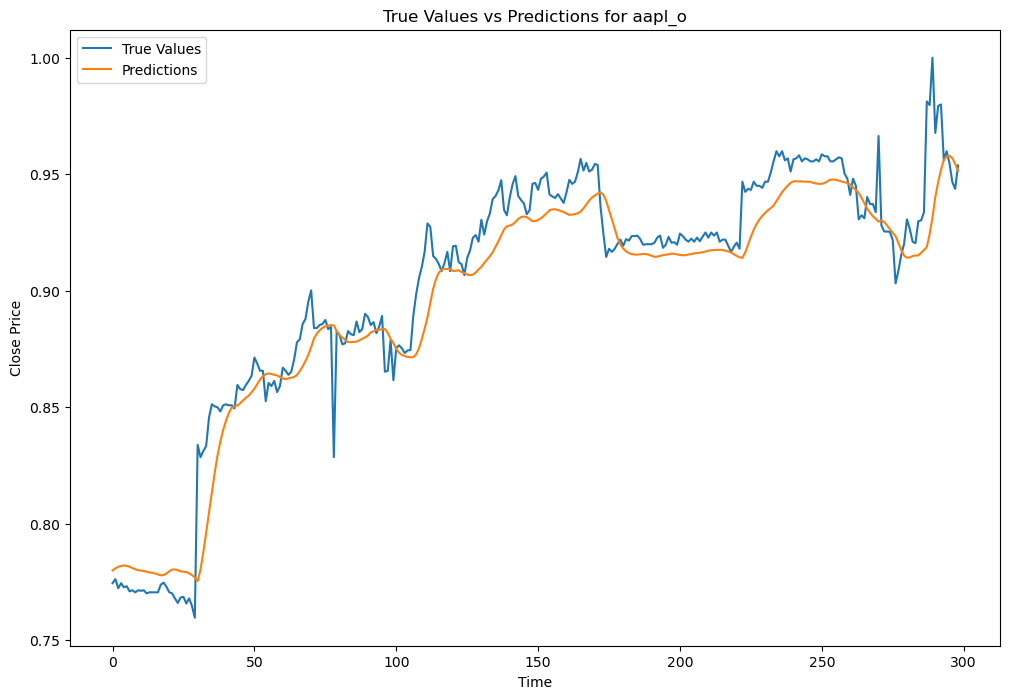

Processing company: abt
Epoch 1/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0228
Epoch 1: val_loss improved from inf to 0.00296, saving model to models/model_abt.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 88ms/step - loss: 0.0225 - val_loss: 0.0030
Epoch 2/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0055
Epoch 2: val_loss improved from 0.00296 to 0.00172, saving model to models/model_abt.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 80ms/step - loss: 0.0054 - val_loss: 0.0017
Epoch 3/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 0.0040
Epoch 3: val_loss improved from 0.00172 to 0.00080, saving model to models/model_abt.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 84ms/step - loss: 0.0040 - val_loss: 7.9868e-04
Epoch 4/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 0.0034
Epoch 4: val_loss did not improve from 0.00080
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0034 - val_loss: 7.9893e-04
Epoch 5/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0032
Epoch 5: val_loss improve

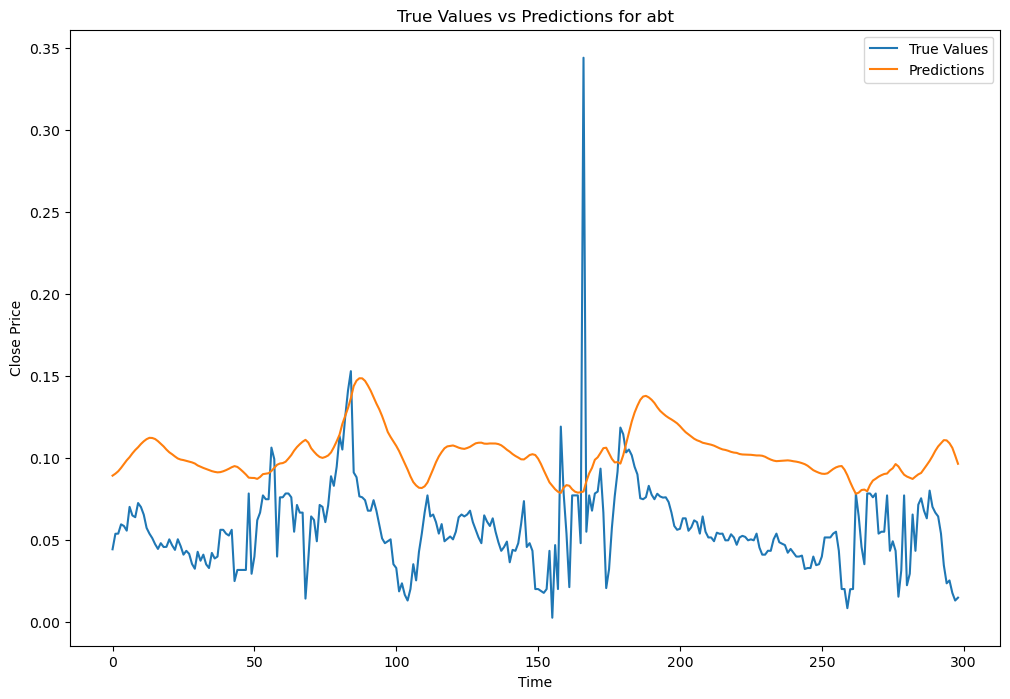

Processing company: ibm
Epoch 1/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0272
Epoch 1: val_loss improved from inf to 0.00013, saving model to models/model_ibm.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 100ms/step - loss: 0.0268 - val_loss: 1.2753e-04
Epoch 2/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0060
Epoch 2: val_loss did not improve from 0.00013
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0.0059 - val_loss: 4.1306e-04
Epoch 3/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0045
Epoch 3: val_loss did not improve from 0.00013
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 0.0045 - val_loss: 2.6653e-04
Epoch 4/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 0.0036
Epoch 4: val_loss improved from 0.00013 to 0.00010, saving model to models/model_ibm.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 0.0036 - val_loss: 1.0011e-04
Epoch 5/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 0.0037
Epoch 5: val_loss did not improve from 0.00010
85/85 ━━━━━━

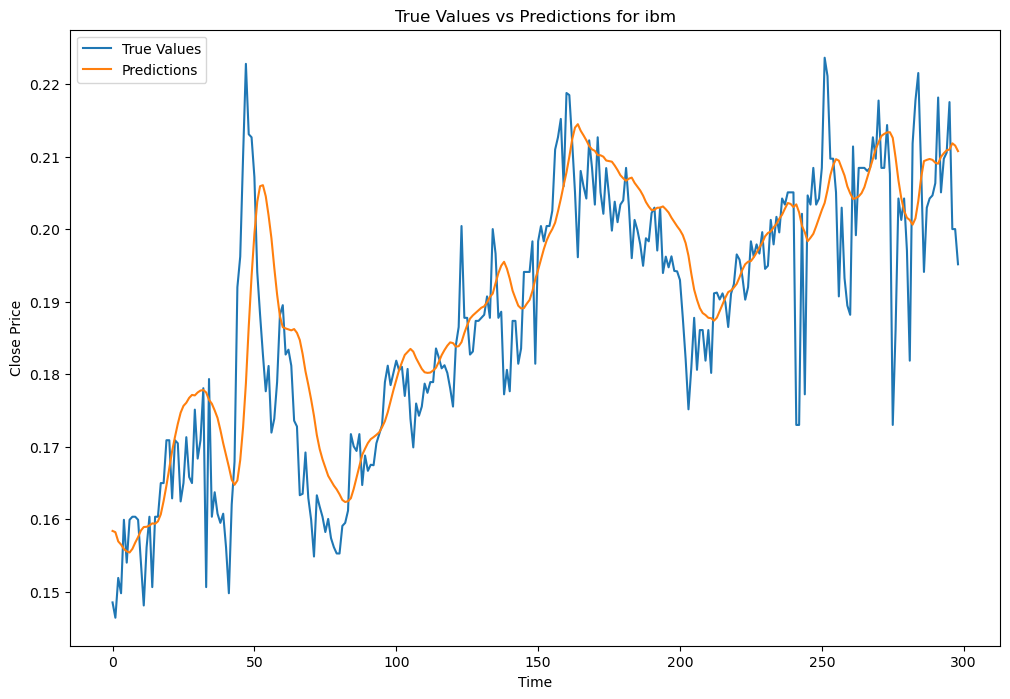

Processing company: adbe_o
Epoch 1/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0044
Epoch 1: val_loss improved from inf to 0.00012, saving model to models/model_adbe_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 81ms/step - loss: 0.0044 - val_loss: 1.1568e-04
Epoch 2/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 5.5086e-04
Epoch 2: val_loss improved from 0.00012 to 0.00009, saving model to models/model_adbe_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 5.5617e-04 - val_loss: 9.3957e-05
Epoch 3/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 4.2209e-04
Epoch 3: val_loss did not improve from 0.00009
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 88ms/step - loss: 4.2748e-04 - val_loss: 1.1549e-04
Epoch 4/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 3.6801e-04
Epoch 4: val_loss improved from 0.00009 to 0.00009, saving model to models/model_adbe_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 3.7327e-04 - val_loss: 8.5343e-05
Epoch 5/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/st

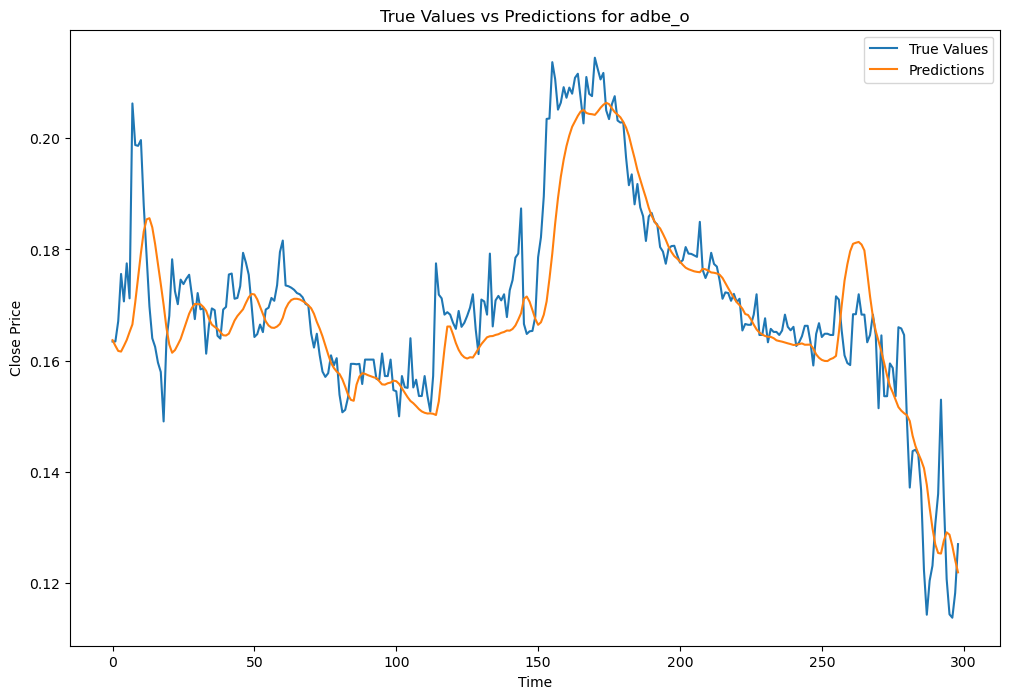

Processing company: biib
Epoch 1/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0189
Epoch 1: val_loss improved from inf to 0.02981, saving model to models/model_biib.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - loss: 0.0187 - val_loss: 0.0298
Epoch 2/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0040
Epoch 2: val_loss improved from 0.02981 to 0.00980, saving model to models/model_biib.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 93ms/step - loss: 0.0040 - val_loss: 0.0098
Epoch 3/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0034
Epoch 3: val_loss did not improve from 0.00980
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0034 - val_loss: 0.0269
Epoch 4/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0031
Epoch 4: val_loss improved from 0.00980 to 0.00760, saving model to models/model_biib.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 88ms/step - loss: 0.0031 - val_loss: 0.0076
Epoch 5/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0031
Epoch 5: val_loss improved f

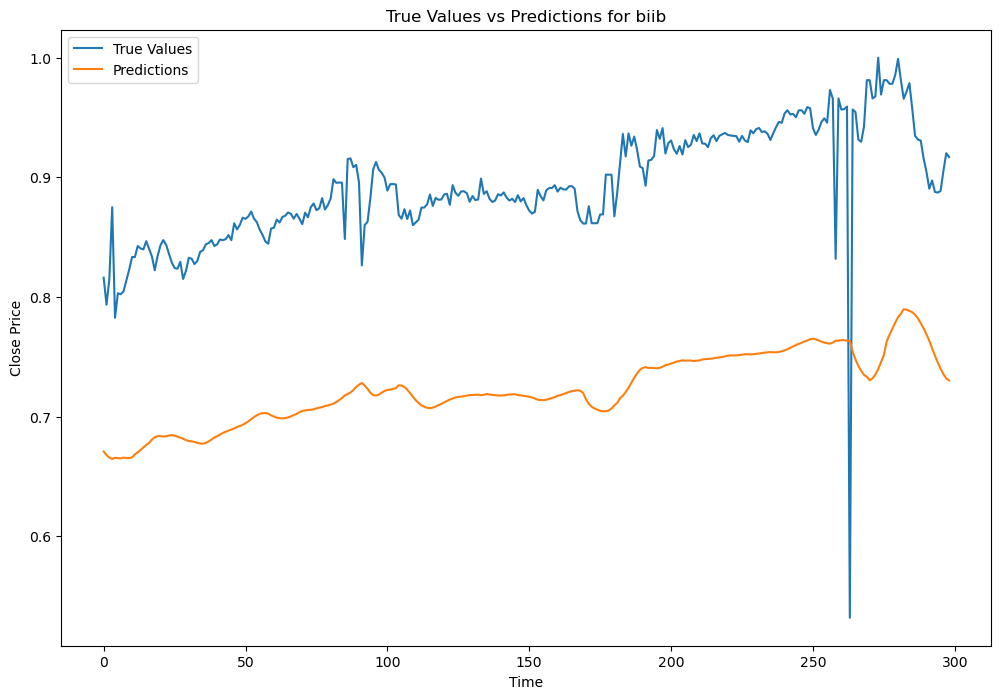

Processing company: ttwo
Epoch 1/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0214
Epoch 1: val_loss improved from inf to 0.00839, saving model to models/model_ttwo.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 15s 145ms/step - loss: 0.0211 - val_loss: 0.0084
Epoch 2/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - loss: 0.0054
Epoch 2: val_loss improved from 0.00839 to 0.00153, saving model to models/model_ttwo.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - loss: 0.0054 - val_loss: 0.0015
Epoch 3/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - loss: 0.0043
Epoch 3: val_loss did not improve from 0.00153
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 87ms/step - loss: 0.0043 - val_loss: 0.0023
Epoch 4/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0037
Epoch 4: val_loss improved from 0.00153 to 0.00145, saving model to models/model_ttwo.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 8s 94ms/step - loss: 0.0037 - val_loss: 0.0015
Epoch 5/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0033
Epoch 5: val_loss improved f

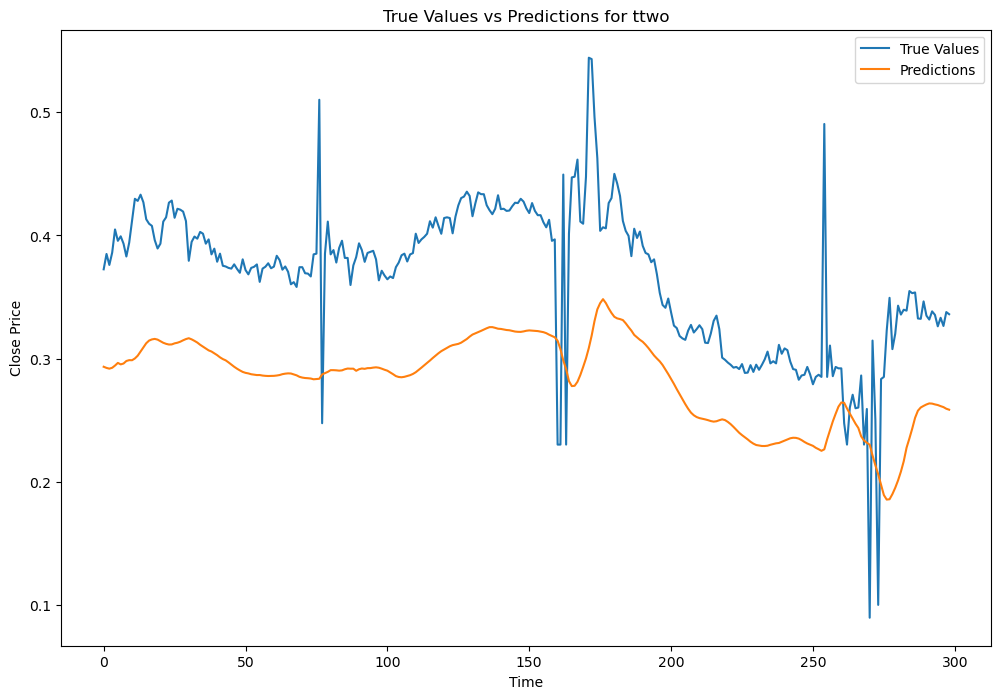

Processing company: cost
Epoch 1/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 0.0142
Epoch 1: val_loss improved from inf to 0.00388, saving model to models/model_cost.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 94ms/step - loss: 0.0140 - val_loss: 0.0039
Epoch 2/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0025
Epoch 2: val_loss improved from 0.00388 to 0.00199, saving model to models/model_cost.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 3/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0018
Epoch 3: val_loss improved from 0.00199 to 0.00073, saving model to models/model_cost.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0018 - val_loss: 7.2593e-04
Epoch 4/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0019
Epoch 4: val_loss improved from 0.00073 to 0.00020, saving model to models/model_cost.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 0.0019 - val_loss: 1.9781e-04
Epoch 5/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 8

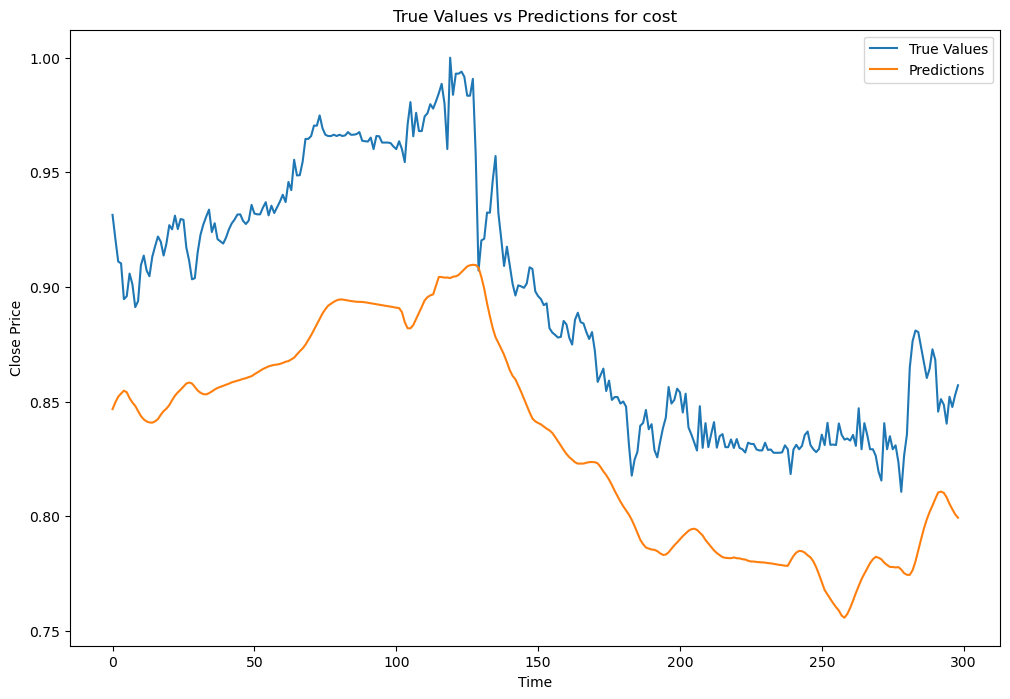

Processing company: ebay
Epoch 1/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0364
Epoch 1: val_loss improved from inf to 0.00344, saving model to models/model_ebay.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - loss: 0.0359 - val_loss: 0.0034
Epoch 2/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0077
Epoch 2: val_loss improved from 0.00344 to 0.00264, saving model to models/model_ebay.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - loss: 0.0077 - val_loss: 0.0026
Epoch 3/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0061
Epoch 3: val_loss improved from 0.00264 to 0.00132, saving model to models/model_ebay.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0061 - val_loss: 0.0013
Epoch 4/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0052
Epoch 4: val_loss improved from 0.00132 to 0.00102, saving model to models/model_ebay.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0052 - val_loss: 0.0010
Epoch 5/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

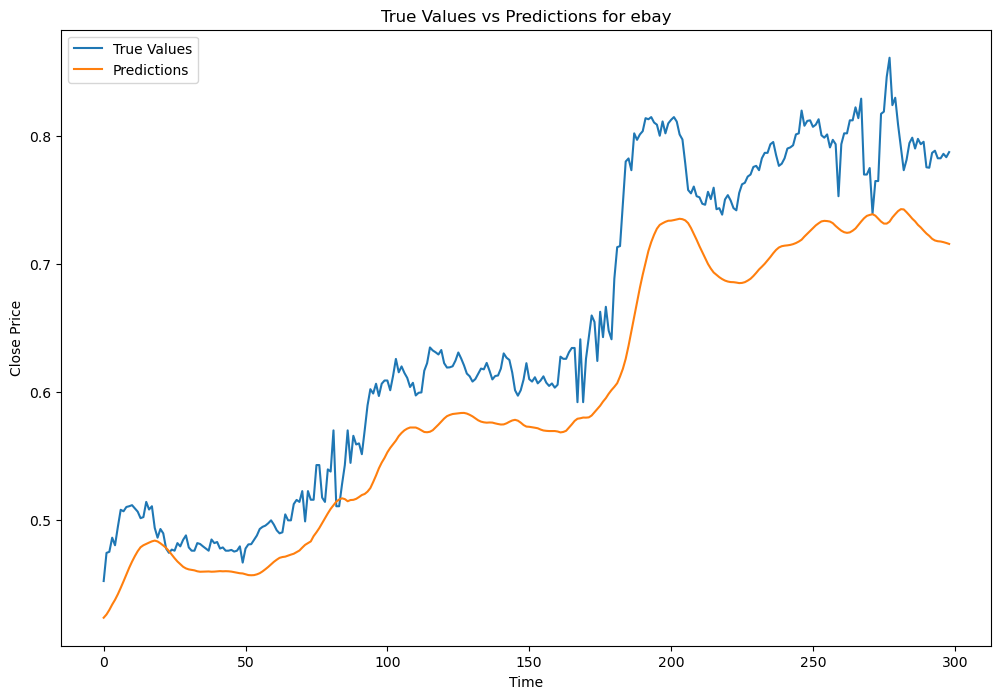

Processing company: intc_o
Epoch 1/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0193
Epoch 1: val_loss improved from inf to 0.00034, saving model to models/model_intc_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 84ms/step - loss: 0.0190 - val_loss: 3.4251e-04
Epoch 2/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - loss: 0.0047
Epoch 2: val_loss did not improve from 0.00034
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 85ms/step - loss: 0.0047 - val_loss: 6.4651e-04
Epoch 3/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0030
Epoch 3: val_loss did not improve from 0.00034
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0030 - val_loss: 0.0014
Epoch 4/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 0.0034
Epoch 4: val_loss did not improve from 0.00034
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0034 - val_loss: 0.0010
Epoch 5/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.0026
Epoch 5: val_loss improved from 0.00034 to 0.00032, saving model to models/model_intc_o.keras
85/85 ━━━━━━━

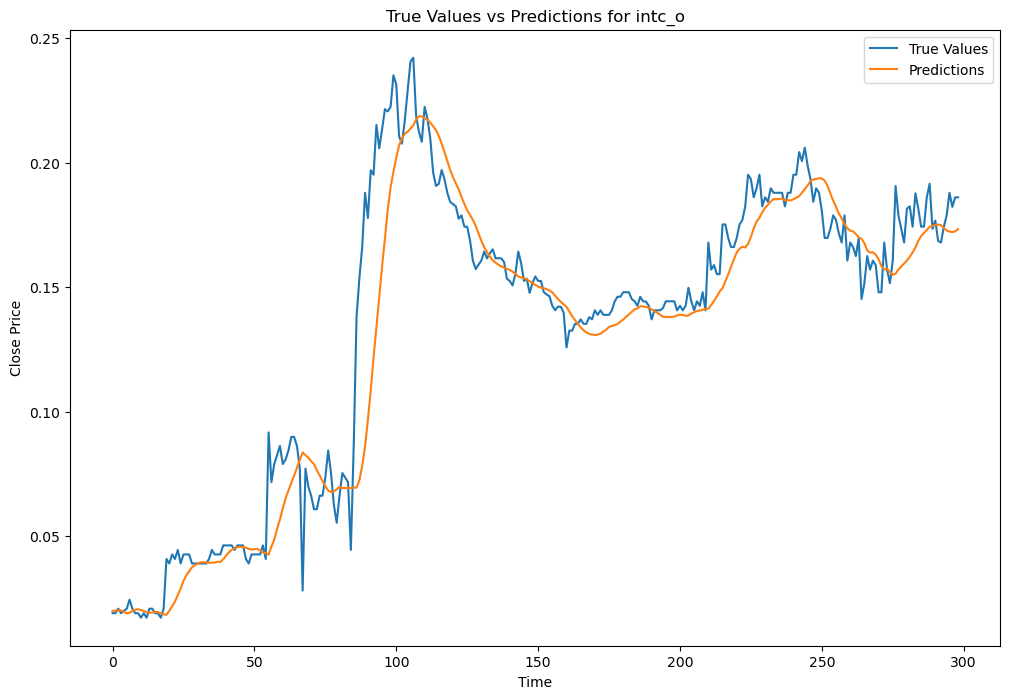

Processing company: nvda_o
Epoch 1/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0311
Epoch 1: val_loss improved from inf to 0.02948, saving model to models/model_nvda_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - loss: 0.0307 - val_loss: 0.0295
Epoch 2/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0067
Epoch 2: val_loss improved from 0.02948 to 0.01235, saving model to models/model_nvda_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0067 - val_loss: 0.0124
Epoch 3/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0054
Epoch 3: val_loss did not improve from 0.01235
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.0054 - val_loss: 0.0206
Epoch 4/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - loss: 0.0053
Epoch 4: val_loss improved from 0.01235 to 0.01071, saving model to models/model_nvda_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 76ms/step - loss: 0.0053 - val_loss: 0.0107
Epoch 5/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0047
Epoch 5: val_loss imp

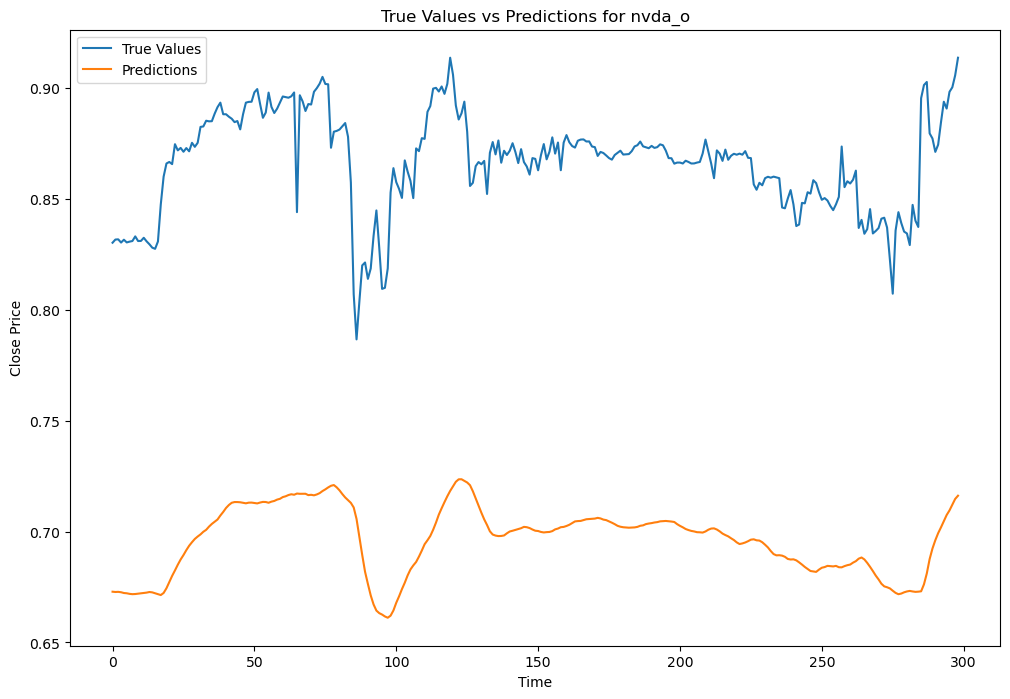

Processing company: xom
Epoch 1/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0628
Epoch 1: val_loss improved from inf to 0.00014, saving model to models/model_xom.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 83ms/step - loss: 0.0619 - val_loss: 1.4048e-04
Epoch 2/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0096
Epoch 2: val_loss did not improve from 0.00014
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0096 - val_loss: 1.9539e-04
Epoch 3/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0070
Epoch 3: val_loss did not improve from 0.00014
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step - loss: 0.0070 - val_loss: 2.8832e-04
Epoch 4/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0060
Epoch 4: val_loss did not improve from 0.00014
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - loss: 0.0060 - val_loss: 3.3617e-04
Epoch 5/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0061
Epoch 5: val_loss did not improve from 0.00014
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0061 - v

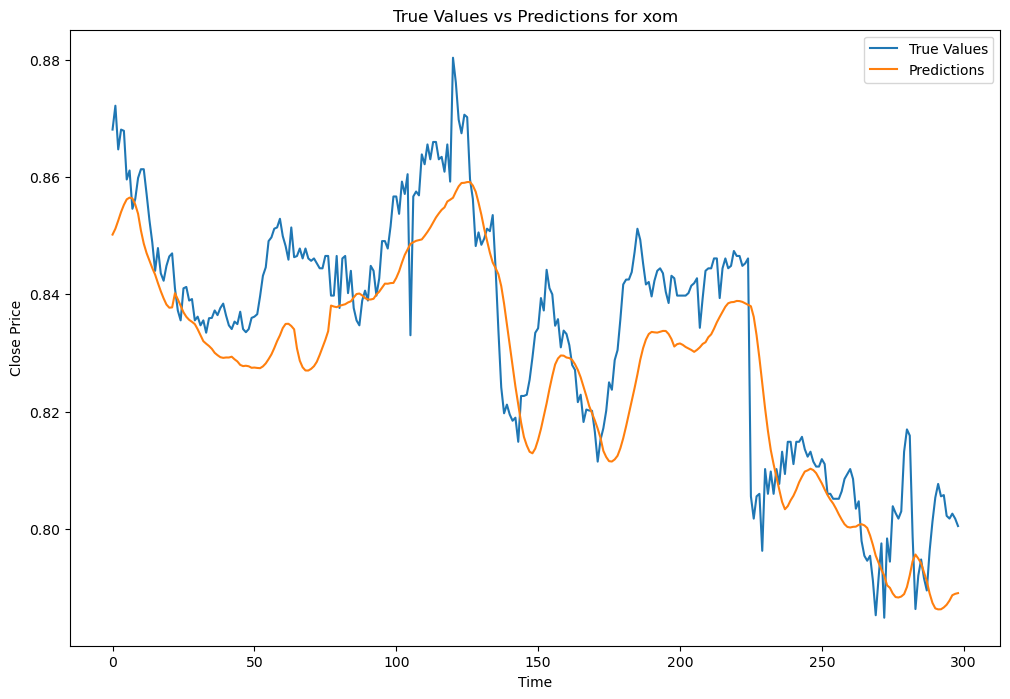

Processing company: cvx
Epoch 1/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0294
Epoch 1: val_loss improved from inf to 0.02728, saving model to models/model_cvx.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - loss: 0.0289 - val_loss: 0.0273
Epoch 2/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0068
Epoch 2: val_loss improved from 0.02728 to 0.01793, saving model to models/model_cvx.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0068 - val_loss: 0.0179
Epoch 3/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0051
Epoch 3: val_loss improved from 0.01793 to 0.01717, saving model to models/model_cvx.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0051 - val_loss: 0.0172
Epoch 4/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0049
Epoch 4: val_loss improved from 0.01717 to 0.00973, saving model to models/model_cvx.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.0049 - val_loss: 0.0097
Epoch 5/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - los

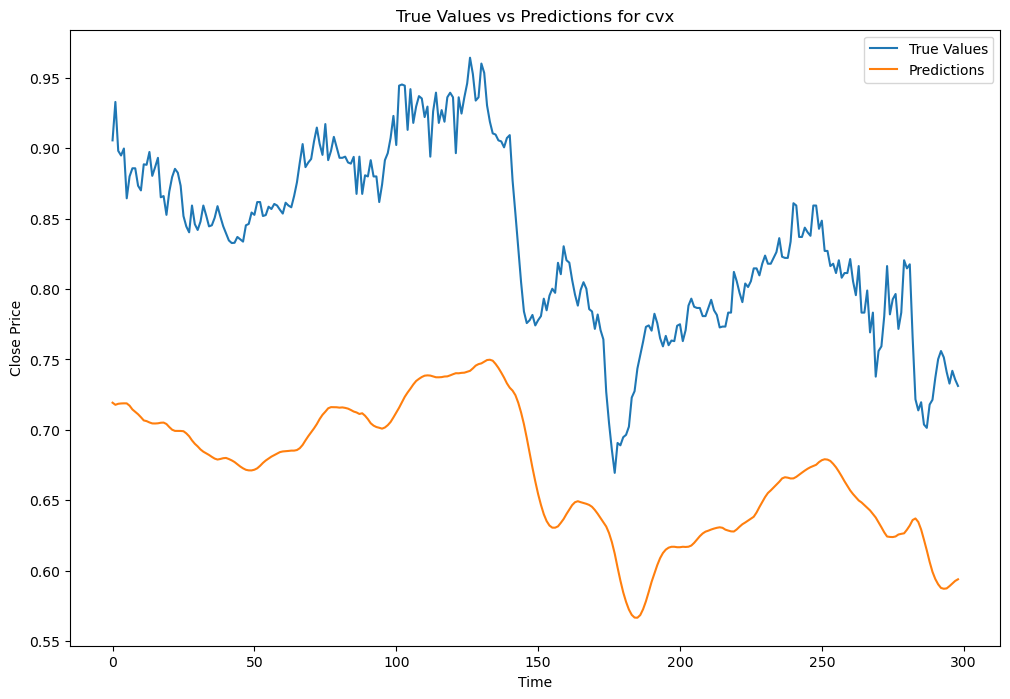

Processing company: pg
Epoch 1/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0246
Epoch 1: val_loss improved from inf to 0.00122, saving model to models/model_pg.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - loss: 0.0243 - val_loss: 0.0012
Epoch 2/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - loss: 0.0046
Epoch 2: val_loss improved from 0.00122 to 0.00031, saving model to models/model_pg.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0046 - val_loss: 3.1363e-04
Epoch 3/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - loss: 0.0038
Epoch 3: val_loss did not improve from 0.00031
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0038 - val_loss: 0.0113
Epoch 4/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0036
Epoch 4: val_loss did not improve from 0.00031
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s 78ms/step - loss: 0.0036 - val_loss: 0.0053
Epoch 5/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - loss: 0.0032
Epoch 5: val_loss did not improve from 0.00031
85/85 ━━━━━━━━━━━━━━━━━━━━ 7s

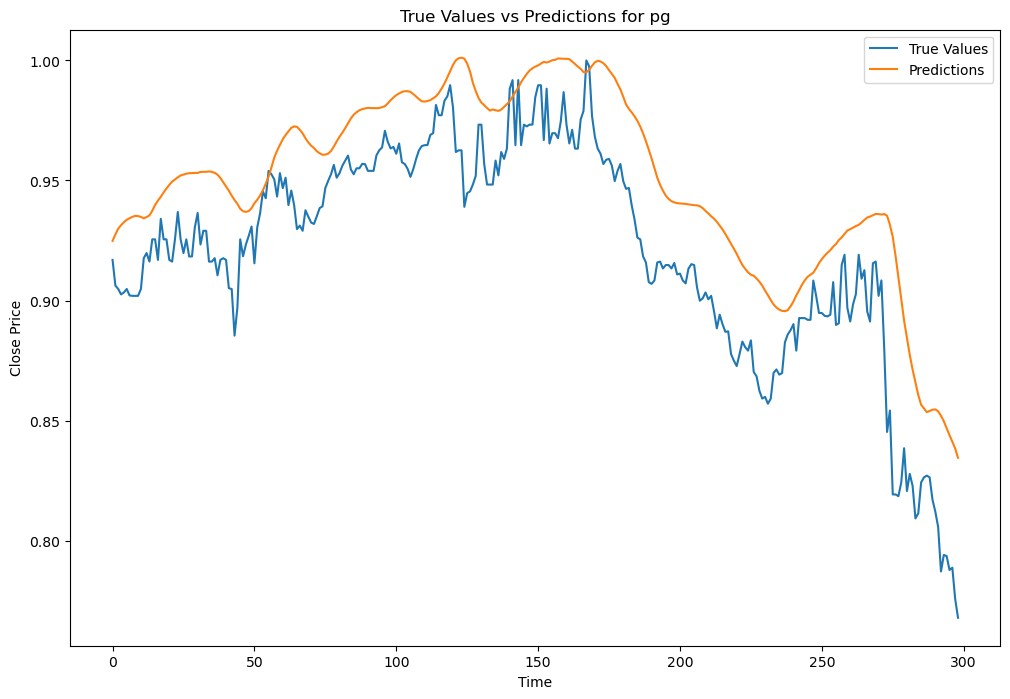

Processing company: tsla_o
Epoch 1/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0344
Epoch 1: val_loss improved from inf to 0.01509, saving model to models/model_tsla_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 9s 69ms/step - loss: 0.0339 - val_loss: 0.0151
Epoch 2/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0082
Epoch 2: val_loss improved from 0.01509 to 0.00366, saving model to models/model_tsla_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 5s 65ms/step - loss: 0.0082 - val_loss: 0.0037
Epoch 3/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0048
Epoch 3: val_loss improved from 0.00366 to 0.00022, saving model to models/model_tsla_o.keras
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 0.0048 - val_loss: 2.1954e-04
Epoch 4/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 0.0036
Epoch 4: val_loss did not improve from 0.00022
85/85 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - loss: 0.0036 - val_loss: 4.1580e-04
Epoch 5/10
84/85 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.0039
Epoch 5: val_l

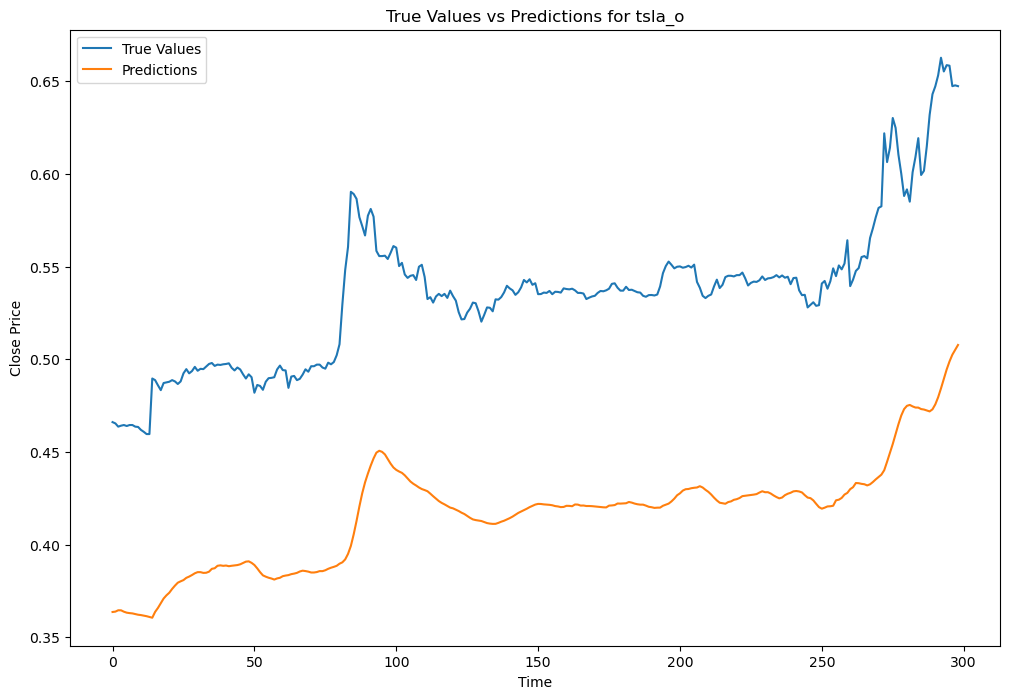

RMSE values for all companies:
{'aapl_o':        loss  val_loss
0  0.099104  0.060178
1  0.067029  0.029402
2  0.063251  0.031611
3  0.058088  0.016771
4  0.057254  0.033265
5  0.055223  0.028328
6  0.052171  0.038970
7  0.052557  0.097263
8  0.049819  0.040397
9  0.049660  0.026339, 'abt':        loss  val_loss
0  0.099050  0.054423
1  0.067733  0.041442
2  0.062298  0.028261
3  0.058199  0.028265
4  0.056207  0.027667
5  0.056407  0.037914
6  0.054084  0.026664
7  0.050007  0.033770
8  0.050174  0.027101
9  0.048554  0.031211, 'ibm':        loss  val_loss
0  0.103301  0.011293
1  0.069548  0.020324
2  0.065450  0.016326
3  0.057344  0.010005
4  0.057380  0.012660
5  0.058641  0.029512
6  0.052072  0.017206
7  0.052585  0.016045
8  0.051396  0.010560
9  0.050061  0.018099, 'adbe_o':        loss  val_loss
0  0.044648  0.010756
1  0.027911  0.009693
2  0.025566  0.010747
3  0.024371  0.009238
4  0.023886  0.018650
5  0.023489  0.027784
6  0.022785  0.013138
7  0.022904  0.021811
8  0.02

In [482]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd
import random
import matplotlib.pyplot as plt

# Create the models directory if it does not exist
if not os.path.exists('models'):
    os.makedirs('models')

# Initialize the early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Dictionary to store RMSE values for each company
rmse_values = {}

# Define a function to plot true values vs predictions
def plot_predictions(y_test, test_predictions, company_name):
    plt.figure(figsize=(12, 8))
    plt.plot(y_test, label='True Values')
    plt.plot(test_predictions, label='Predictions')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.title(f'True Values vs Predictions for {company_name}')
    plt.legend()
    plt.show()

# Ensure the random seed is set before the loop
seed = 1241
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
keras.utils.set_random_seed(seed)


for company in companies:
    print(f"Processing company: {company}")

    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    keras.utils.set_random_seed(seed)
    
    # Fetch the train and test data for the current company
    X_train = globals()[f'X_train_{company}']
    y_train = globals()[f'y_train_{company}']
    X_test = globals()[f'X_test_{company}']
    y_test = globals()[f'y_test_{company}']
    
    # Define the architecture of the RNN
    number_of_features = X_train.shape[2]
    rnn = Sequential([
        LSTM(units=200, return_sequences=True, name='LSTM_1', activation='tanh', input_shape=(12, number_of_features)),
        Dropout(0.3),
        LSTM(units=200, name='LSTM_2', activation='tanh'),
        Dropout(0.3),
        Dense(1, name='Output')
    ])
    
    # Compile the model
    optimizer = RMSprop(learning_rate=0.0005, rho=0.9, epsilon=1e-08)
    rnn.compile(loss='mean_squared_error', optimizer=optimizer)
    
    # Define the model checkpoint callback
    checkpointer = ModelCheckpoint(filepath=f'models/model_{company.replace(".", "_").lower()}.keras', verbose=1, save_best_only=True, monitor='val_loss')
    
    # Train the model
    lstm_training = rnn.fit(X_train, y_train,
                            epochs=10,
                            batch_size=32,
                            validation_data=(X_test, y_test),
                            callbacks=[checkpointer, early_stopping],
                            verbose=1)
    
    # Evaluate the model
    evaluation = rnn.evaluate(X_test, y_test)
    print(f'Final model evaluation for {company}: {evaluation}')
    
    # Store RMSE values
    loss_history = pd.DataFrame(lstm_training.history).pow(.5)
    rmse_values[company] = loss_history

    # Make predictions
    test_predict_scaled = rnn.predict(X_test)
    
    # Convert predictions to a Pandas Series for easy comparison
    test_predict_series = pd.Series(test_predict_scaled.squeeze(), index=range(len(y_test)))
    
    # Convert y_test to a Pandas Series for easy comparison
    y_test_series = pd.Series(y_test.squeeze(), index=range(len(y_test)))
    
    # Plot the predictions against the true values
    plot_predictions(y_test_series, test_predict_series, company)

# Print RMSE values for all companies
print("RMSE values for all companies:")
print(rmse_values)


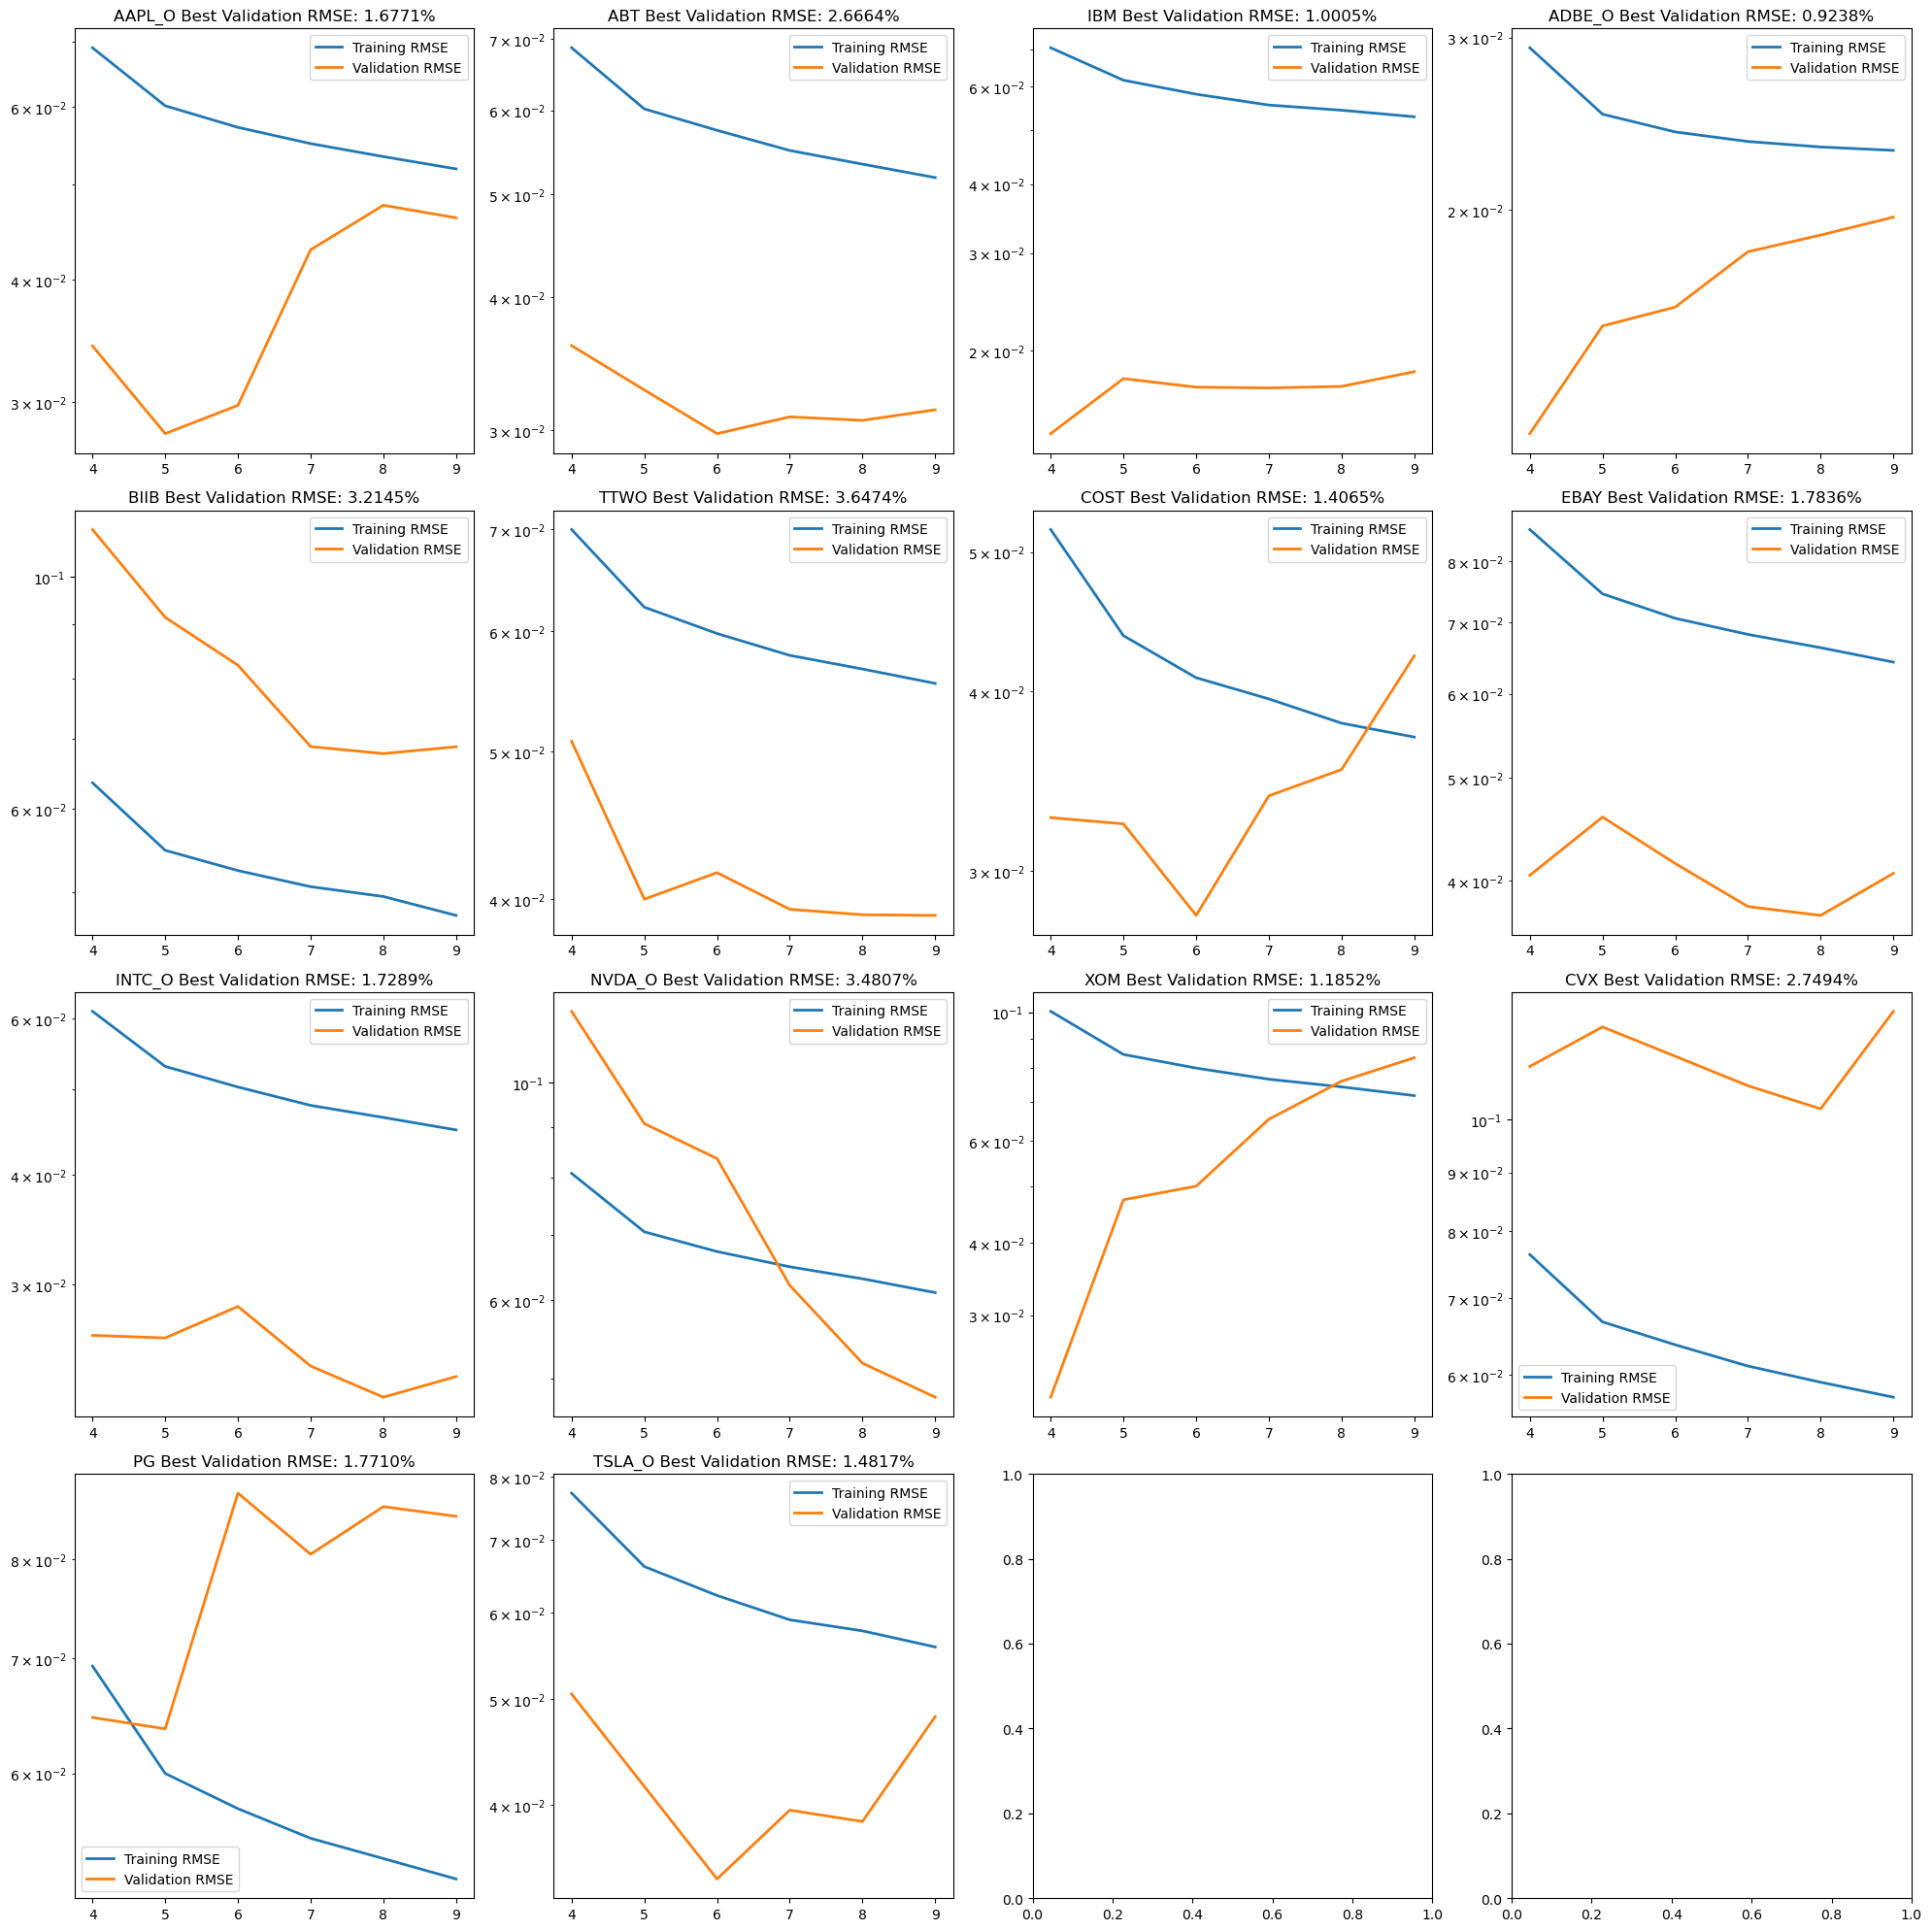

In [483]:
# Plotting RMSE for all companies
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  

for ax, (company, history) in zip(axs.flatten(), rmse_values.items()):
    best_rmse = history.val_loss.min()
    best_epoch = history.val_loss.idxmin()
    title = f'{company.upper()} Best Validation RMSE: {best_rmse:.4%}'
    
    history.columns = ['Training RMSE', 'Validation RMSE']
    history.rolling(5).mean().plot(logy=True, lw=2, ax=ax, title=title)

plt.tight_layout()
plt.show()

In [82]:
lstm_training.history

{'loss': [0.032148610800504684,
  0.0049179126508533955,
  0.004067676141858101,
  0.004197051748633385,
  0.003485948545858264,
  0.003518796293064952,
  0.003373332554474473,
  0.003324933582916856,
  0.003093633335083723,
  0.003146560164168477,
  0.003014272078871727,
  0.0027912771329283714,
  0.0028099247720092535,
  0.002786746248602867,
  0.0026631958317011595,
  0.002586101647466421,
  0.0026668692007660866,
  0.002620691666379571,
  0.0028037342708557844,
  0.002498009940609336,
  0.0024998376611620188,
  0.002728736726567149,
  0.002443774603307247,
  0.0024037519469857216,
  0.0024179439060389996,
  0.0023892284370958805,
  0.002357618883252144,
  0.0023511373437941074,
  0.002415482886135578,
  0.0023079917300492525,
  0.0022763197775930166,
  0.0022077690809965134,
  0.002412242814898491,
  0.002179805189371109,
  0.0022447488736361265,
  0.002137854229658842,
  0.0021322339307516813,
  0.002221166156232357,
  0.0020830421708524227,
  0.002228794153779745,
  0.00222963443

In [413]:
lstm_training.val_loss.min()

AttributeError: 'History' object has no attribute 'val_loss'

<Axes: title={'center': 'Best Validation RMSE:  1.0959%'}>

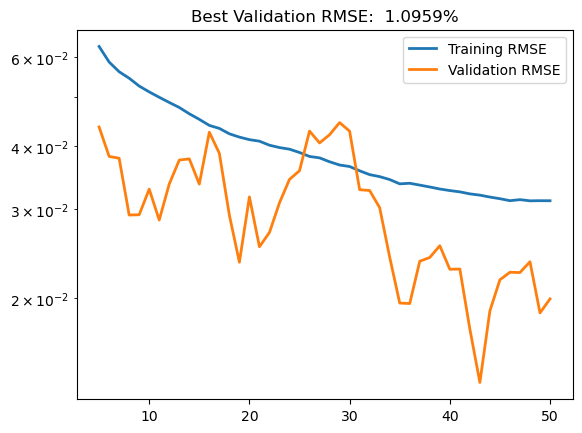

In [467]:

loss_history = pd.DataFrame(lstm_training.history).pow(.5)
loss_history.index += 1
best_rmse = loss_history.val_loss.min()
best_epoch = loss_history.val_loss.idxmin()
loss_history.columns = ['Training RMSE', 'Validation RMSE']
title = f'Best Validation RMSE: {best_rmse: .4%}'
loss_history.rolling(5).mean().plot(logy=True,lw=2,title=title)

### Rescaling predictions to plot it better

In [487]:
test_predict_scaled = rnn.predict(X_test_tsla_o)

####UNIVARIATE: test_predict = pd.Series(scaler.inverse_transform(test_predict_scaled).squeeze(), index=y_test.index)

test_predict_reshaped = test_predict_scaled.reshape(-1, 1)
test_predict_rescaled = scaler.inverse_transform(test_predict_reshaped).squeeze()
test_predict_series = pd.Series(test_predict_rescaled, index=range(len(y_test)))



10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step


In [469]:
y_test_aapl_o.min()

0.7597034452682072

In [488]:
#y_test_reshaped = y_test.values.reshape(-1, 1)  # Reshape y_test to 2D
#y_rescaled = pd.Series(scaler.inverse_transform(y_test_reshaped).squeeze(), index=y_test.index)


# Reshape y_test to 2D for inverse transformation
y_test_reshaped = y_test_tsla_o.reshape(-1, 1)

# Inverse transform y_test to its original scale
y_rescaled = scaler.inverse_transform(y_test_reshaped).squeeze()

# Convert the rescaled y_test to a Pandas Series for easy comparison
y_rescaled_series = pd.Series(y_rescaled, index=range(len(y_test)))



In [425]:
y_rescaled_series

0      185.590499
1      185.690613
2      185.465357
3      185.590499
4      185.490386
          ...    
294    196.227584
295    195.927243
296    195.468221
297    195.301282
298    195.877186
Length: 299, dtype: float64

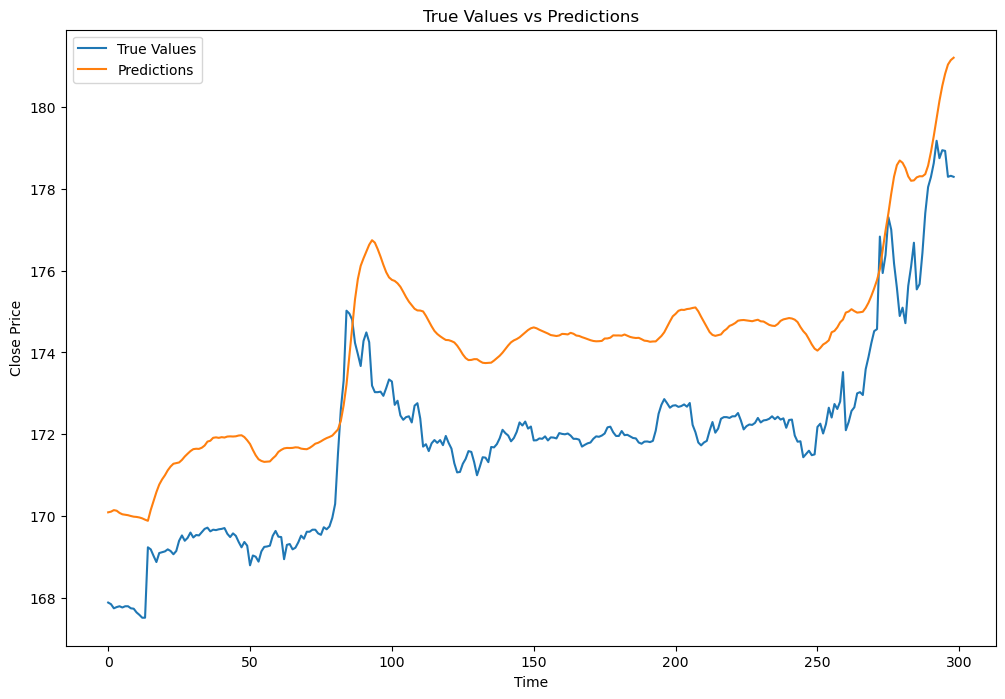

In [489]:
# TRUE VALUE VS PREDICTIONS
plt.figure(figsize=(12, 8))
plt.plot(y_rescaled_series, label='True Values')
plt.plot(test_predict_series, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('True Values vs Predictions')
plt.legend()
plt.show()

In [455]:
rnn.predict(X_test_aapl_o)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[0.6138042 ],
       [0.61446226],
       [0.61495817],
       [0.6151942 ],
       [0.6153599 ],
       [0.6151925 ],
       [0.61475945],
       [0.6142404 ],
       [0.6138033 ],
       [0.61342025],
       [0.6133882 ],
       [0.6133223 ],
       [0.61308   ],
       [0.61278236],
       [0.61279607],
       [0.6125189 ],
       [0.6121042 ],
       [0.6117213 ],
       [0.61167496],
       [0.61221236],
       [0.6132974 ],
       [0.61416733],
       [0.61428285],
       [0.6141965 ],
       [0.61397445],
       [0.614274  ],
       [0.61434984],
       [0.6139735 ],
       [0.6131067 ],
       [0.61201835],
       [0.6104609 ],
       [0.6126979 ],
       [0.6167574 ],
       [0.6219332 ],
       [0.62715375],
       [0.63309467],
       [0.64008504],
       [0.64630914],
       [0.6517625 ],
       [0.65700424],
       [0.6616421 ],
       [0.6659345 ],
       [0.66925144],
       [0.66998446],
       [0.6704476 ],
       [0.6712482 ],
       [0.672231  ],
       [0.673

# **<span style="color:red;">THIS IS THE OTHER PART CAUSING ISSUES</span>**
# These are the graphs of the first try of my predictions: without incorporating the predictions inside the for loop

10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step


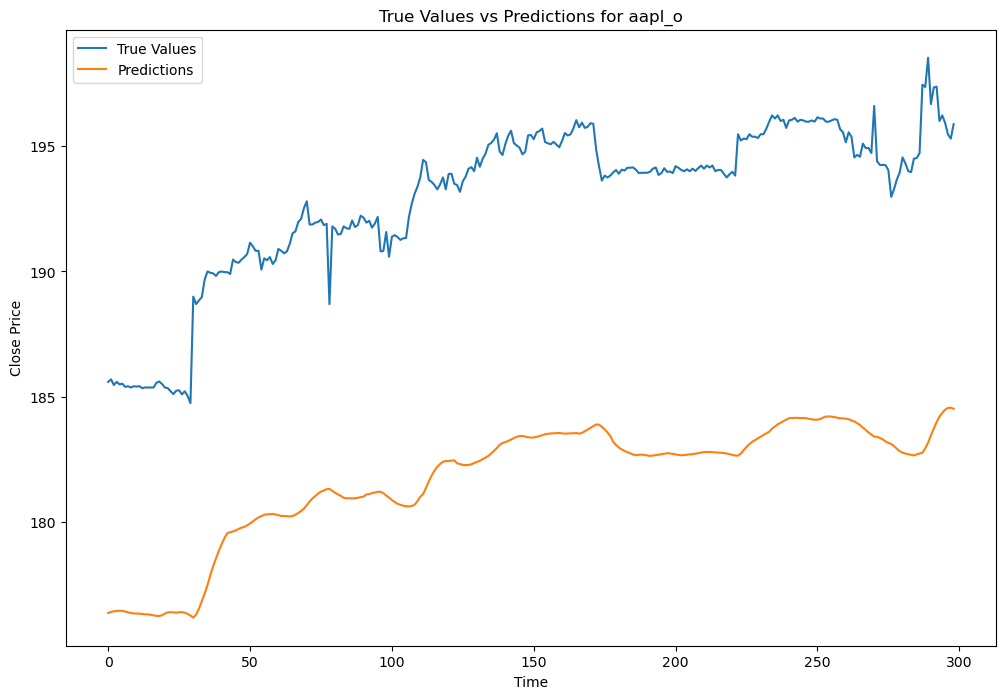

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


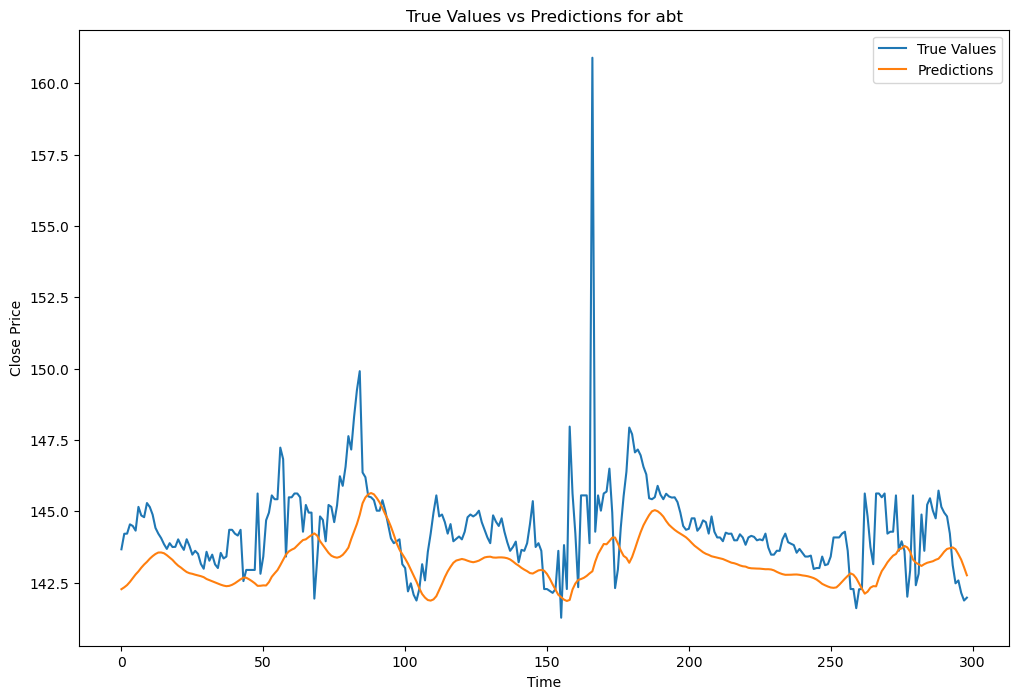

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


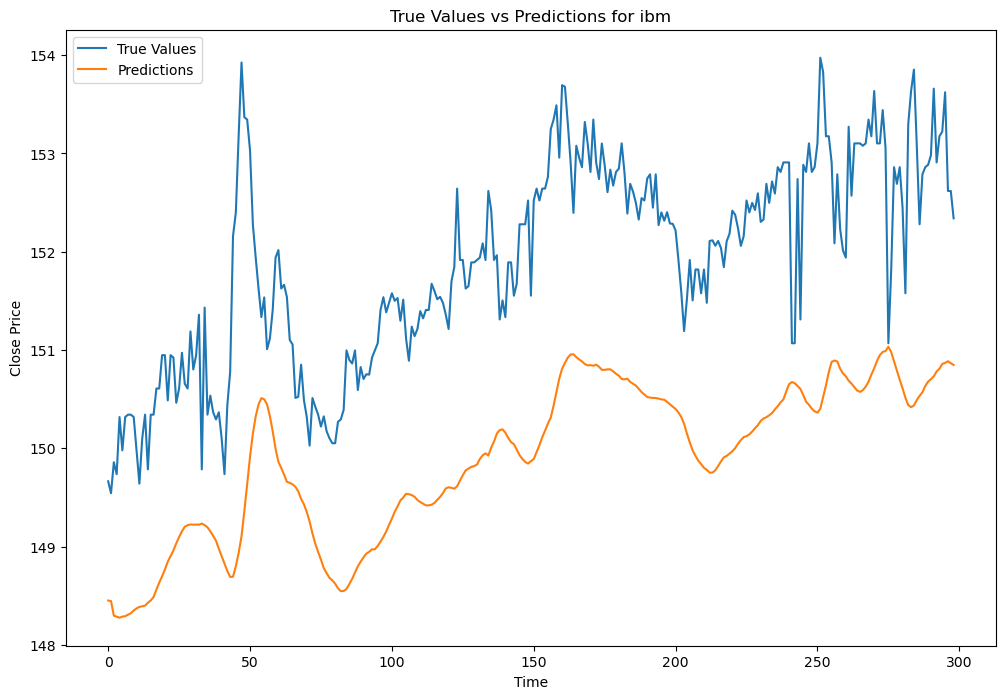

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


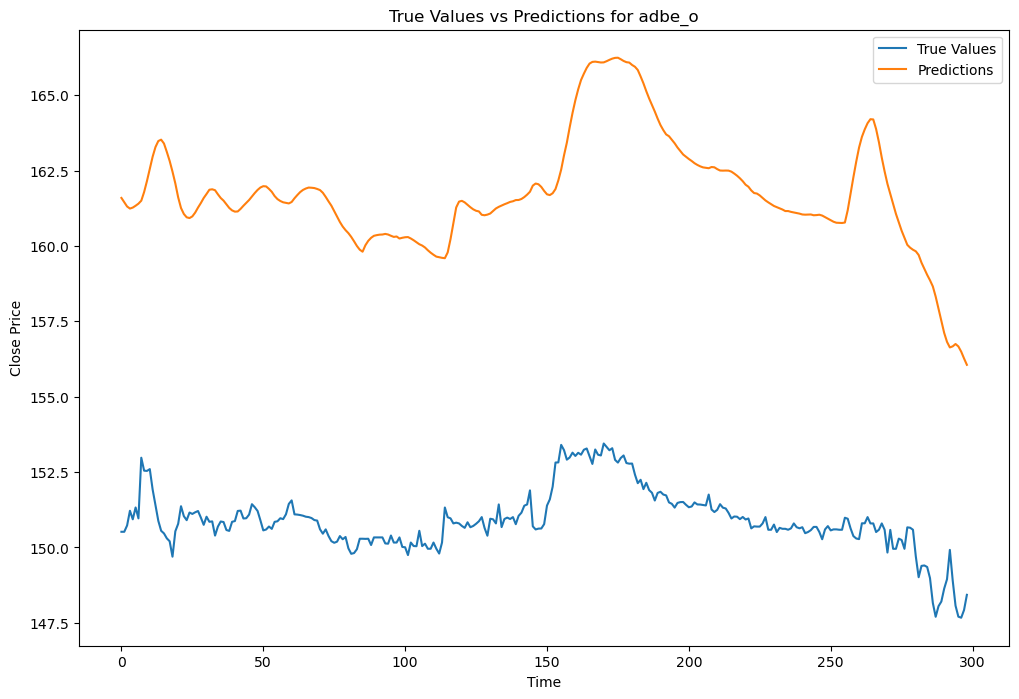

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


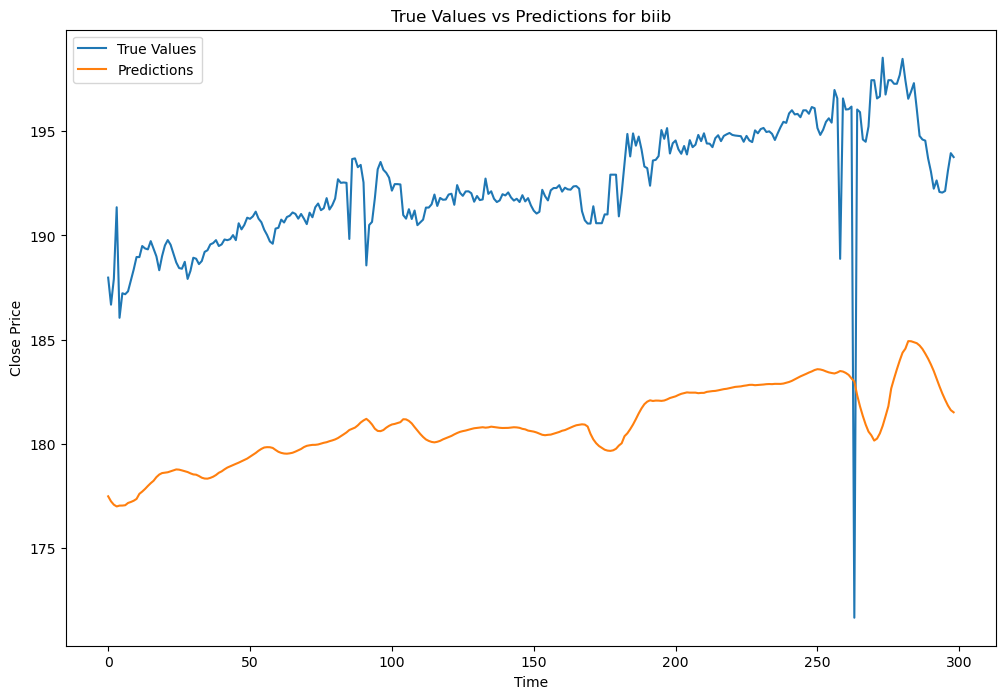

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


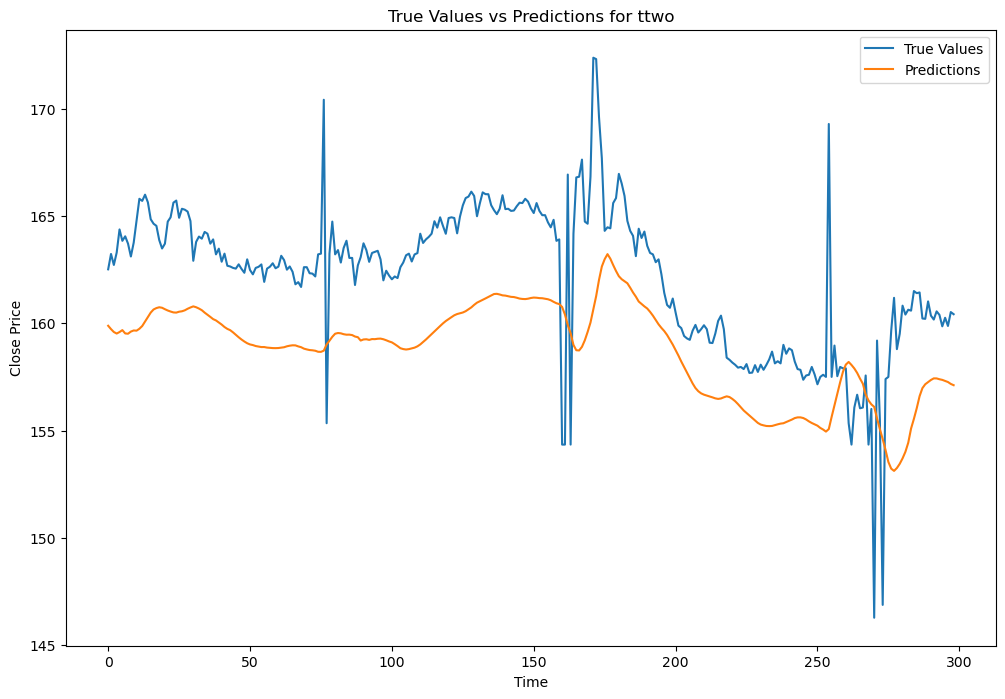

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


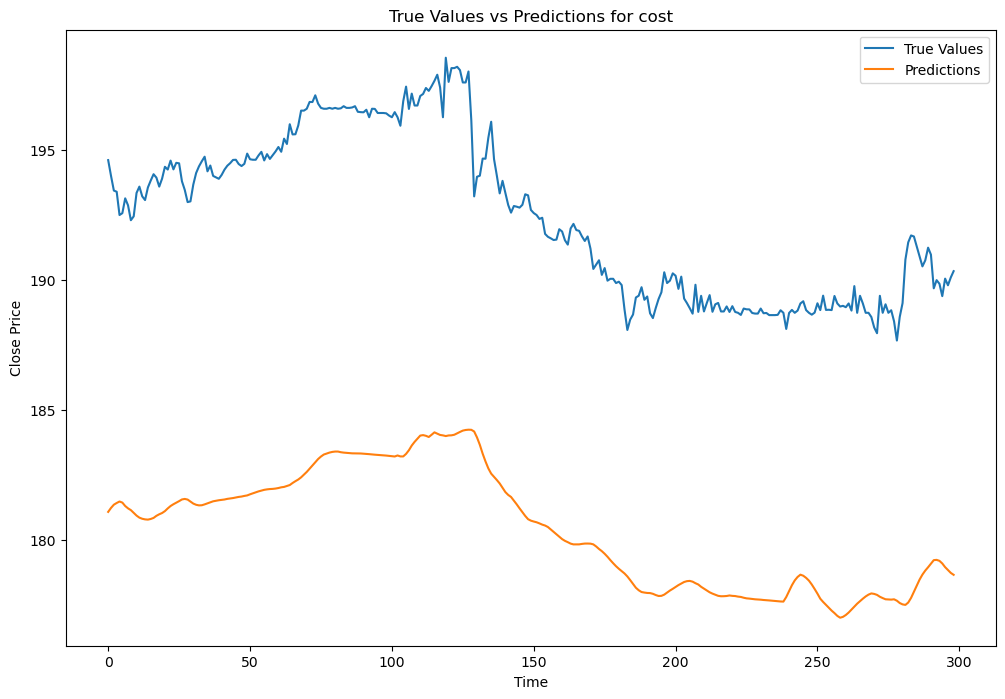

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


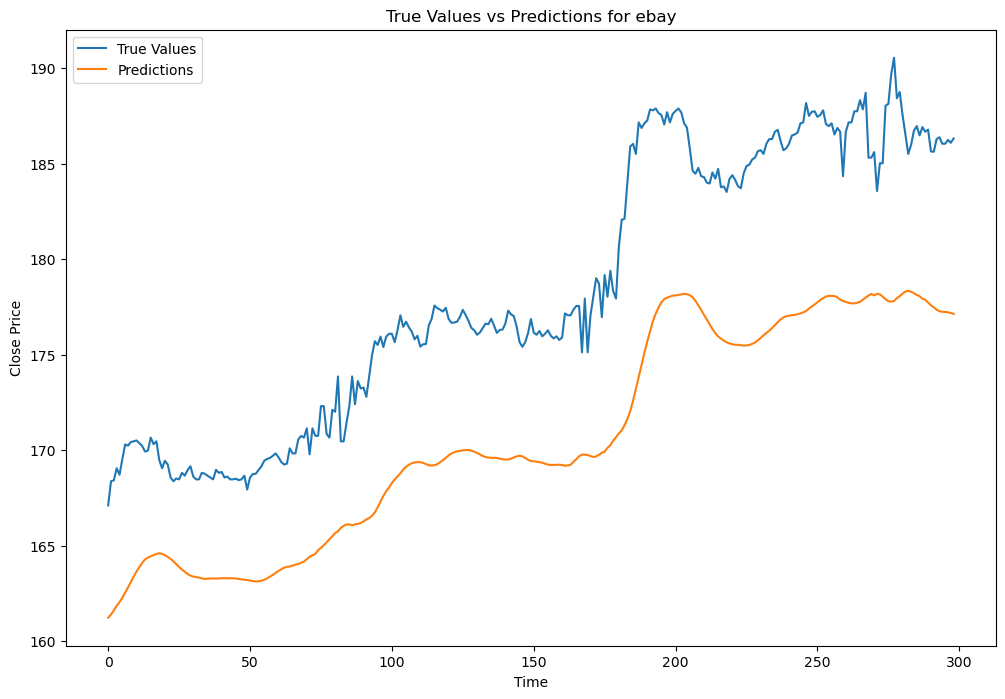

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


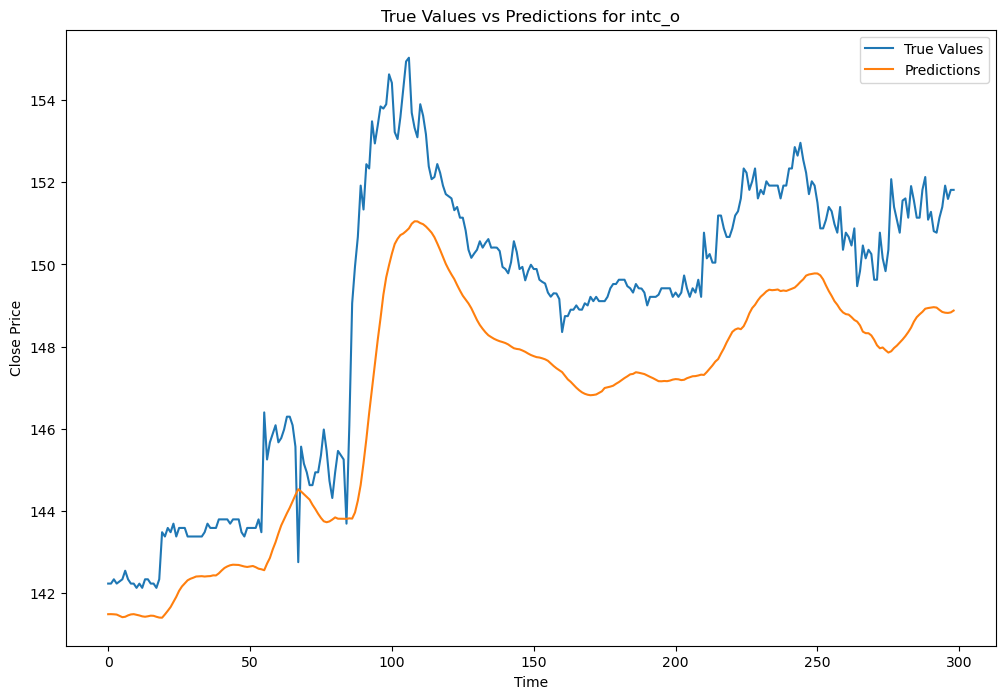

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


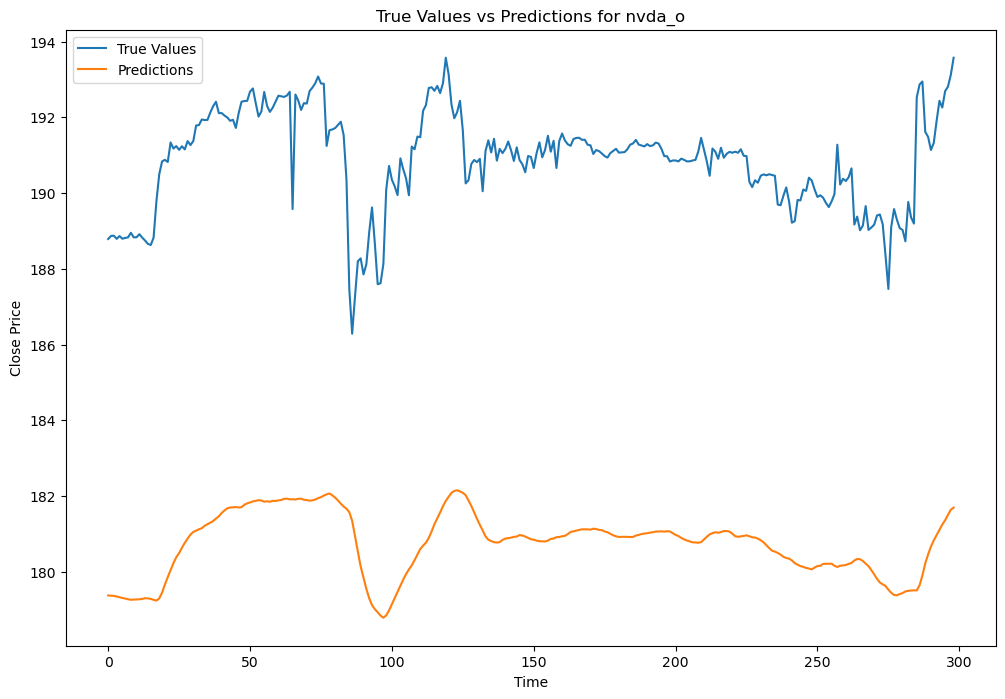

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


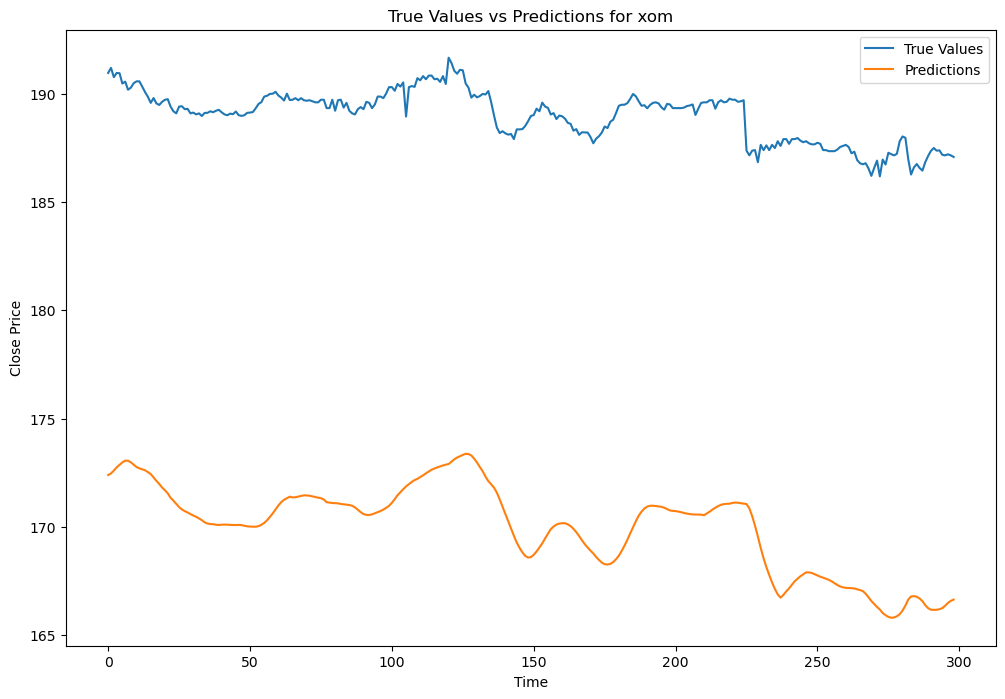

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


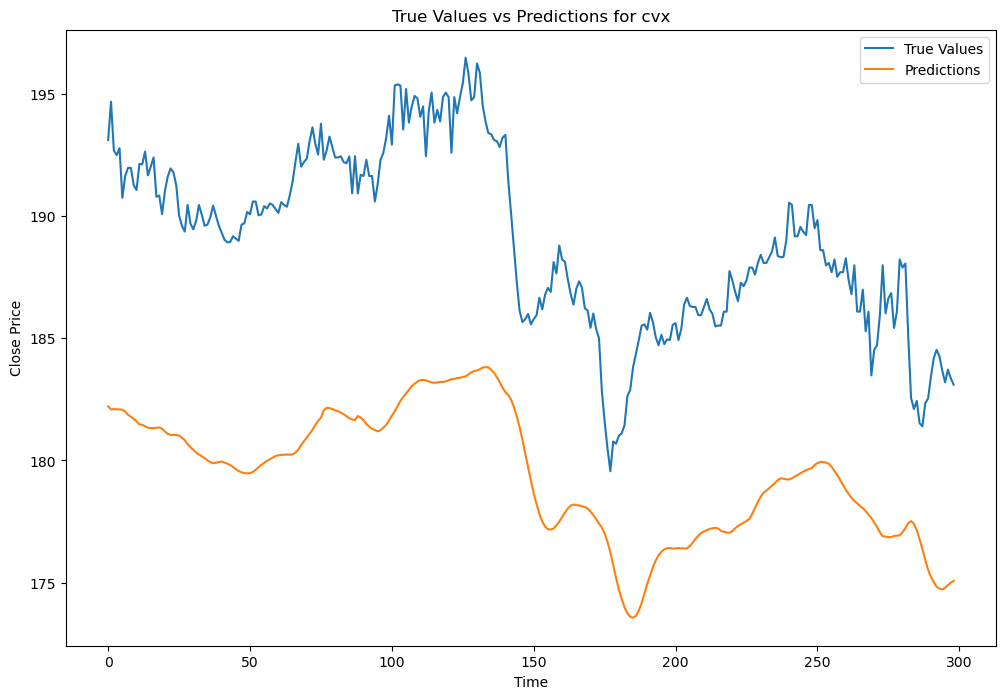

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


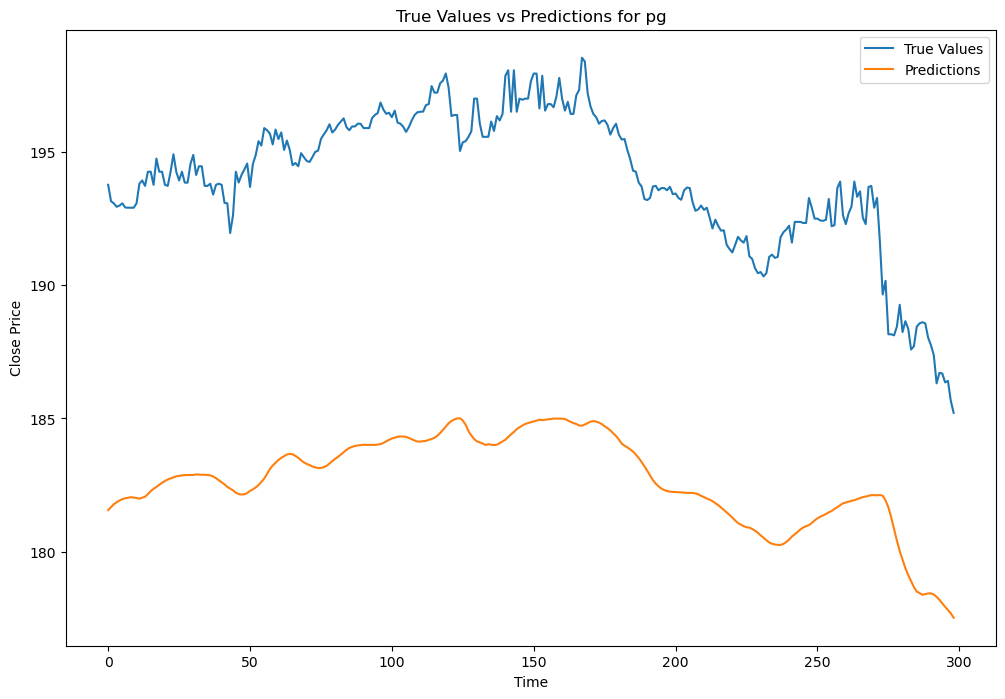

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


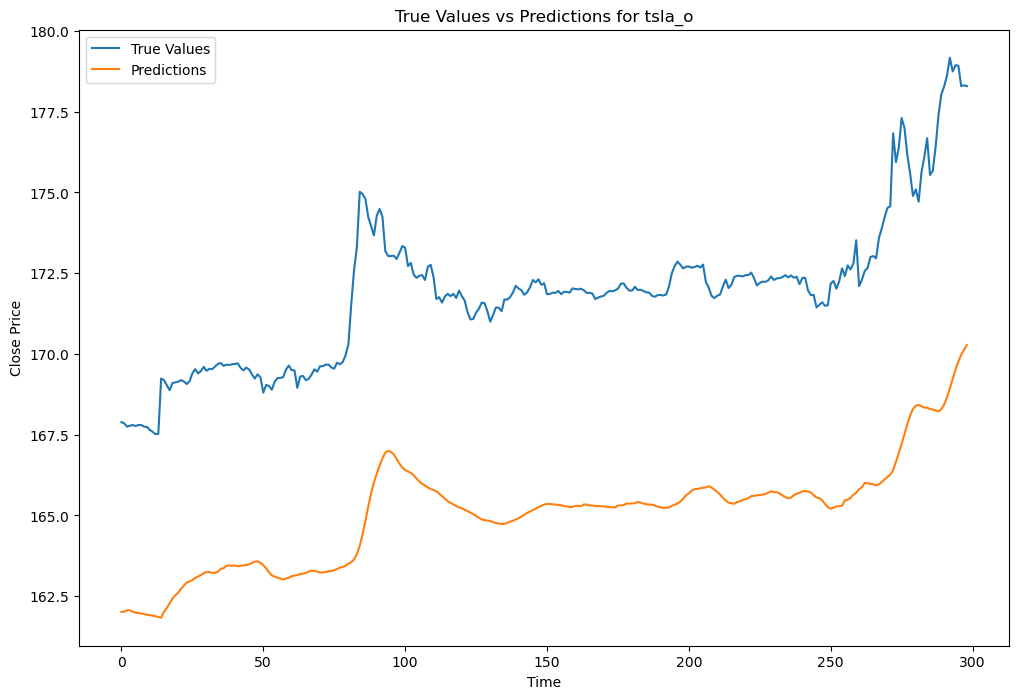

In [452]:
# Define a function to plot true values vs predictions
def plot_predictions(y_test, test_predictions, company_name):
    plt.figure(figsize=(12, 8))
    plt.plot(y_test, label='True Values')
    plt.plot(test_predictions, label='Predictions')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.title(f'True Values vs Predictions for {company_name}')
    plt.legend()
    plt.show()





# Loop through each company and make predictions
for company in companies:
    # Prepare the variables
    X_test = globals()[f'X_test_{company.replace(".", "_").lower()}']
    y_test = globals()[f'y_test_{company.replace(".", "_").lower()}']
    
    # Make predictions
    test_predict_scaled = rnn.predict(X_test)
    
    # Reshape predictions to 2D array for inverse transformation
    test_predict_reshaped = test_predict_scaled.reshape(-1, 1)
    # Inverse transform the predictions
    test_predict_rescaled = scaler.inverse_transform(test_predict_reshaped).squeeze()
    
    # Convert predictions to a Pandas Series for easy comparison
    test_predict_series = pd.Series(test_predict_rescaled, index=range(len(y_test)))
    
    # Reshape y_test to 2D for inverse transformation
    y_test_reshaped = y_test.reshape(-1, 1)
    # Inverse transform y_test to its original scale
    y_rescaled = scaler.inverse_transform(y_test_reshaped).squeeze()
    # Convert y_test to a Pandas Series for easy comparison
    y_rescaled_series = pd.Series(y_rescaled, index=range(len(y_test)))
    
    # Plot the predictions against the true values
    plot_predictions(y_rescaled_series, test_predict_rescaled, company)

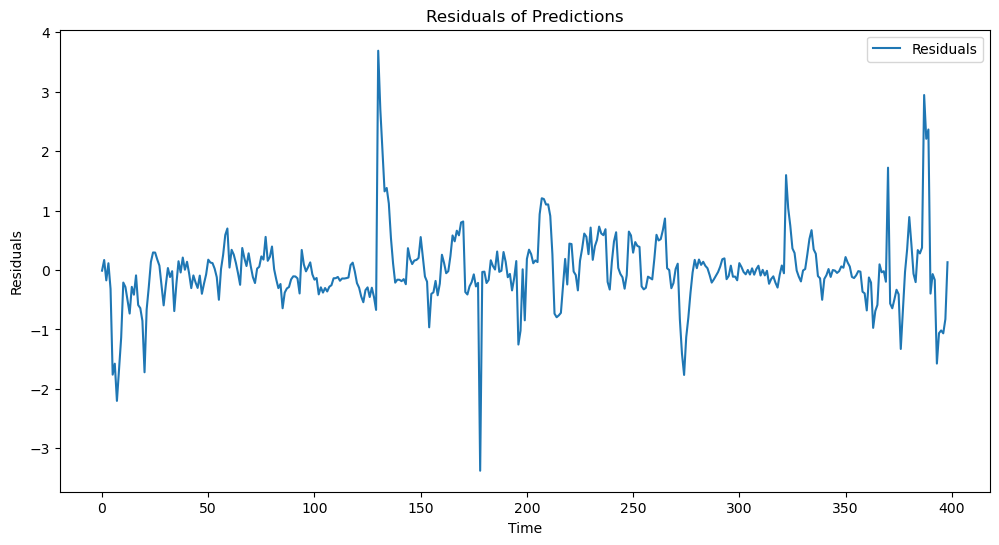

In [362]:
# RESIDUAL PLOT: difference between the true values and the predicted values to visualize the errors
residuals = y_rescaled_series - test_predict_series

# Plot residuals
plt.figure(figsize=(12, 6))
plt.plot(residuals, label='Residuals')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.title('Residuals of Predictions')
plt.legend()
plt.show()

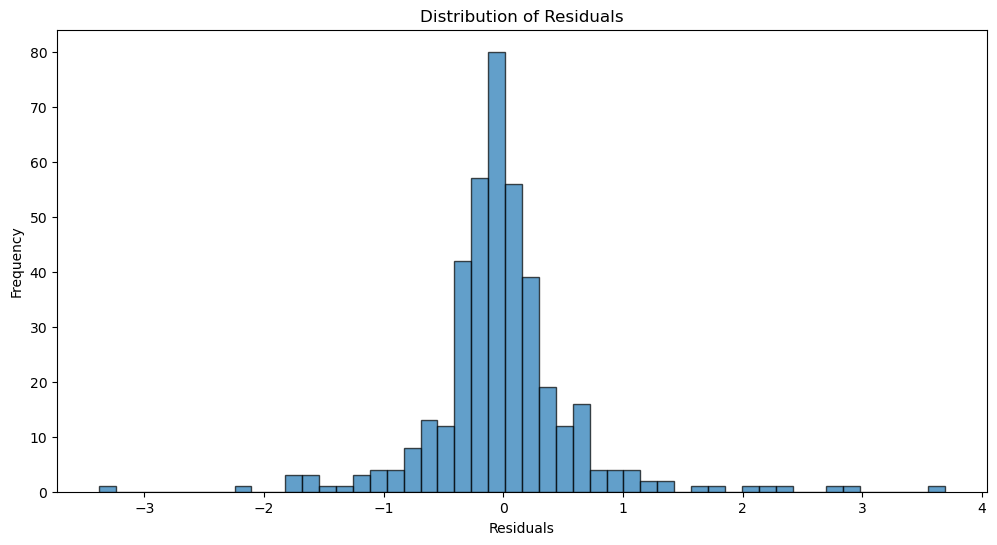

In [363]:
# ERROR Distribution: distribution of prediction errors to understand the spread and bias in my model’s predictions.

plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=50, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()


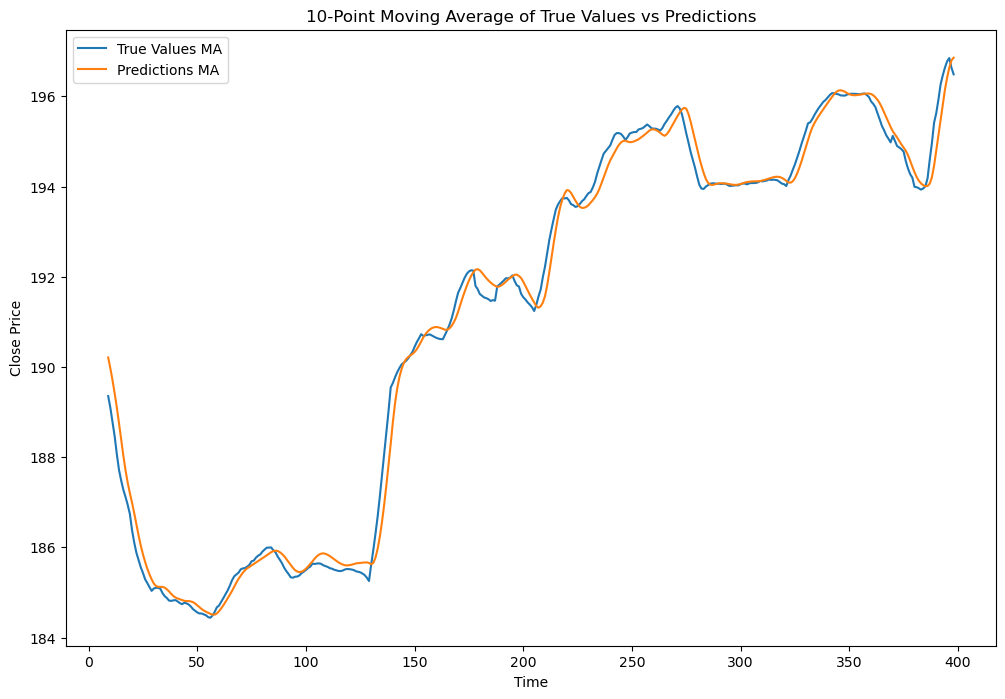

In [364]:
# MOVING AVERAGE COMPARISON: moving average of the true and predicted values to smooth out short-term fluctuations and highlight longer-term trends.
# Calculate moving averages
window_size = 10
y_rescaled_ma = y_rescaled_series.rolling(window=window_size).mean()
test_predict_ma = test_predict_series.rolling(window=window_size).mean()

# Plot moving averages
plt.figure(figsize=(12, 8))
plt.plot(y_rescaled_ma, label='True Values MA')
plt.plot(test_predict_ma, label='Predictions MA')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title(f'{window_size}-Point Moving Average of True Values vs Predictions')
plt.legend()
plt.show()


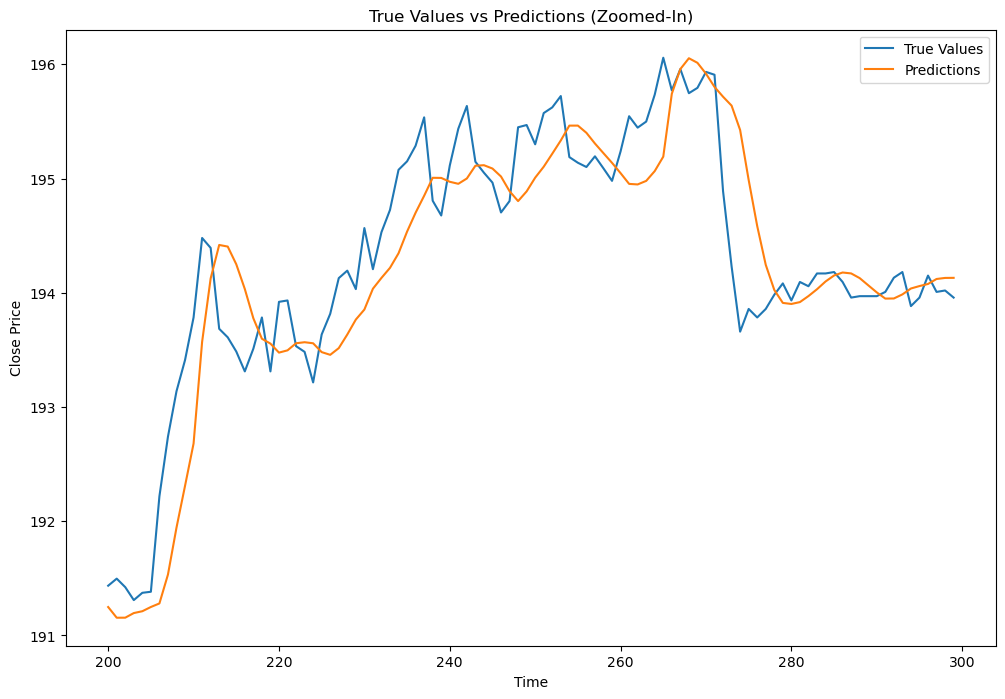

In [367]:
# ZOOMED IN PLOT: zoomed-in plots for specific time periods to examine the model's performance in greater detail.
# Define a range to zoom in
start, end = 200, 300

# Plot zoomed-in view
plt.figure(figsize=(12, 8))
plt.plot(y_rescaled_series[start:end], label='True Values')
plt.plot(test_predict_series[start:end], label='Predictions')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('True Values vs Predictions (Zoomed-In)')
plt.legend()
plt.show()


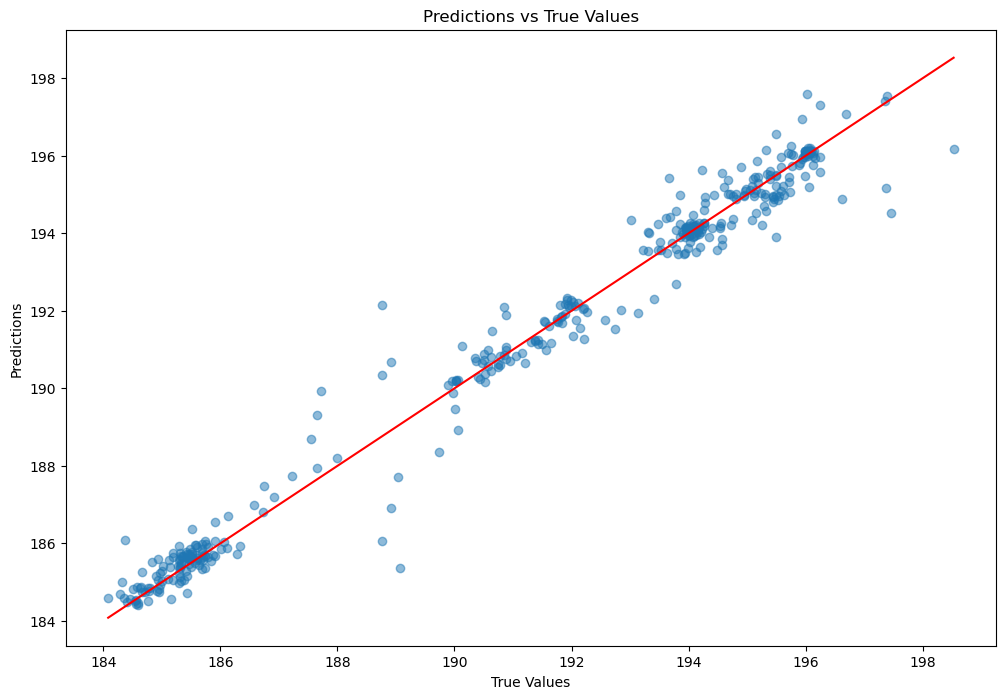

In [368]:
# PREDICTION VS ACTUAL SCATTER PLOT: predicted values against the actual values to see how well the model predictions correlate with the true values.
# Plot predictions vs actual values
plt.figure(figsize=(12, 8))
plt.scatter(y_rescaled_series, test_predict_series, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values')
plt.plot([min(y_rescaled_series), max(y_rescaled_series)], [min(y_rescaled_series), max(y_rescaled_series)], 'r')  # Diagonal line
plt.show()



##### Quantitative Metrics to evaluate the model

In [369]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate MAE
mae = mean_absolute_error(y_rescaled_series, test_predict_series)
print(f"Mean Absolute Error (MAE): {mae:.4f}")

# Calculate MSE
mse = mean_squared_error(y_rescaled_series, test_predict_series)
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Calculate R-squared
r2 = r2_score(y_rescaled_series, test_predict_series)
print(f"R-squared (R²): {r2:.4f}")


Mean Absolute Error (MAE): 0.3787
Mean Squared Error (MSE): 0.3751
R-squared (R²): 0.9786


Profit: $2381.33
Return on Investment (ROI): 2.38%
Sharpe Ratio: 1.11


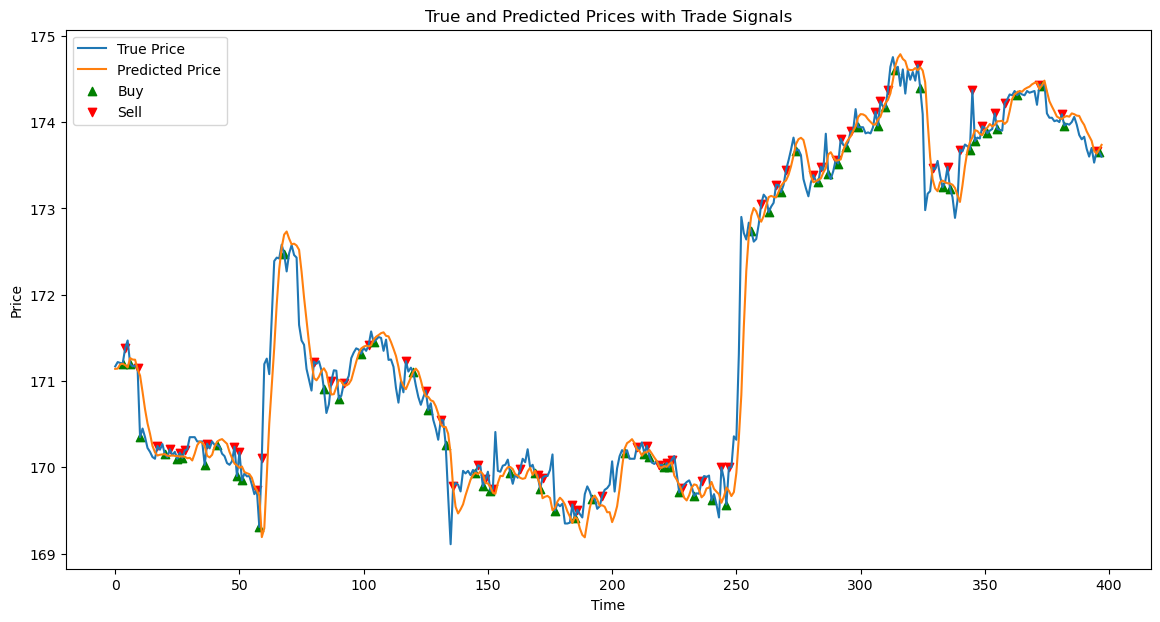

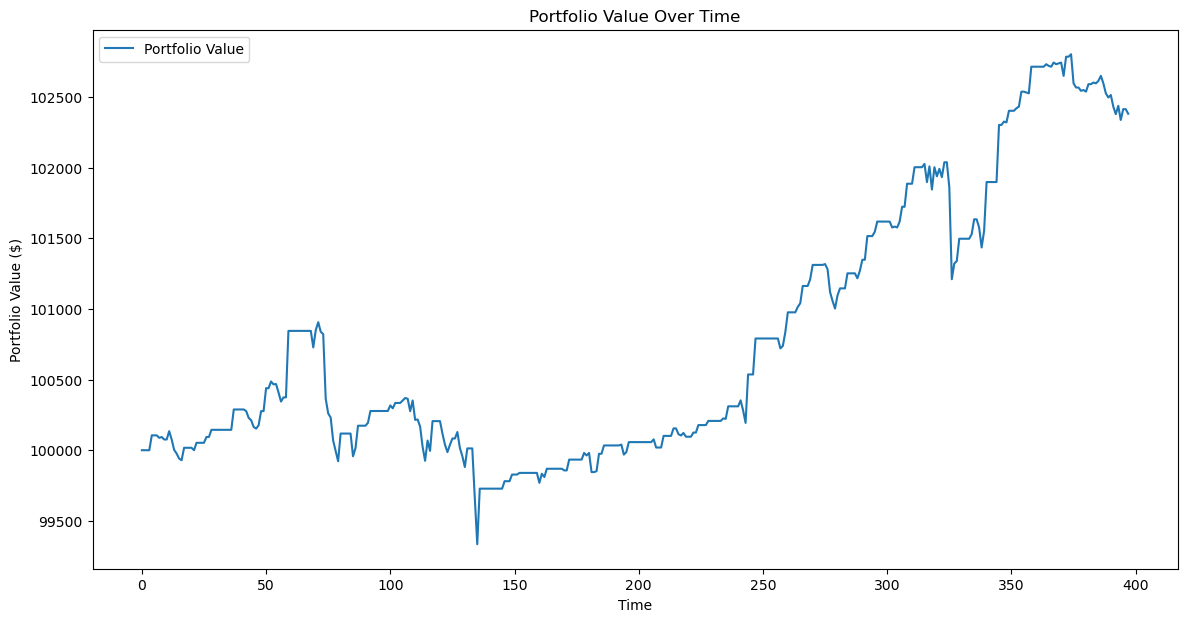

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Initialize variables
initial_cash = 100000  # Starting with $100,000
cash = initial_cash
positions = 0
portfolio_value = []
trades = []

# Define trading rules
def trading_strategy(predicted_price, current_price, positions, cash):
    action = 'hold'
    if predicted_price > current_price and cash > current_price:
        action = 'buy'
    elif predicted_price < current_price and positions > 0:
        action = 'sell'
    return action

# Simulate trading process
for i in range(len(y_rescaled_series)):
    current_price = y_rescaled_series.iloc[i]
    predicted_price = test_predict_series.iloc[i]

    action = trading_strategy(predicted_price, current_price, positions, cash)

    if action == 'buy':
        positions += cash // current_price
        cash %= current_price
        trades.append((y_rescaled_series.index[i], 'buy', current_price))
    elif action == 'sell':
        cash += positions * current_price
        positions = 0
        trades.append((y_rescaled_series.index[i], 'sell', current_price))

    portfolio_value.append(cash + positions * current_price)

# Convert portfolio value to a pandas Series for easier plotting and analysis
portfolio_value_series = pd.Series(portfolio_value, index=y_rescaled_series.index)

# Calculate performance metrics
final_cash = cash + positions * y_rescaled_series.iloc[-1]
profit = final_cash - initial_cash
roi = (final_cash - initial_cash) / initial_cash * 100
print(f"Profit: ${profit:.2f}")
print(f"Return on Investment (ROI): {roi:.2f}%")

# Calculate Sharpe Ratio
returns = portfolio_value_series.pct_change().dropna()
sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)  # Assuming daily returns
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Plot the portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(y_rescaled_series, label='True Price')
plt.plot(test_predict_series, label='Predicted Price')

# Mark buy and sell points
for trade in trades:
    if trade[1] == 'buy':
        plt.scatter(trade[0], trade[2], marker='^', color='green', label='Buy')
    elif trade[1] == 'sell':
        plt.scatter(trade[0], trade[2], marker='v', color='red', label='Sell')

# Avoid duplicate labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('True and Predicted Prices with Trade Signals')
plt.show()

# Plot the portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(portfolio_value_series, label='Portfolio Value')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()


### After implementing the first version of the model with multiple features. I try autokeras to find the optimal version for predictions

Trial 29 Complete [00h 07m 08s]
val_loss: 0.00017491231847088784

Best val_loss So Far: 7.355476554948837e-05
Total elapsed time: 13h 03m 12s
Epoch 1/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 13s 60ms/step - loss: 0.0540 - mean_squared_error: 0.0540
Epoch 2/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0241 - mean_squared_error: 0.0241
Epoch 3/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0148 - mean_squared_error: 0.0148
Epoch 4/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0091 - mean_squared_error: 0.0091
Epoch 5/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 62ms/step - loss: 0.0057 - mean_squared_error: 0.0057
Epoch 6/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 57ms/step - loss: 0.0036 - mean_squared_error: 0.0036
Epoch 7/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - loss: 0.0024 - mean_squared_error: 0.0024
Epoch 8/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 9s 55ms/step - loss: 0.0017 - mean_squared_error: 0.0017
Epoch 9/500
167/167 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.001

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 72, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_to_float32 (CastToFloat32) │ (None, 72, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 72, 5)          │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 5)              │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ regression_head_1 (Dense)       │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 366 (1.43 KB)

 Trainable params: 366 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 6.8018e-05 - mean_squared_error: 6.8146e-05
Best model evaluation: [7.870546687627211e-05, 7.998629007488489e-05]


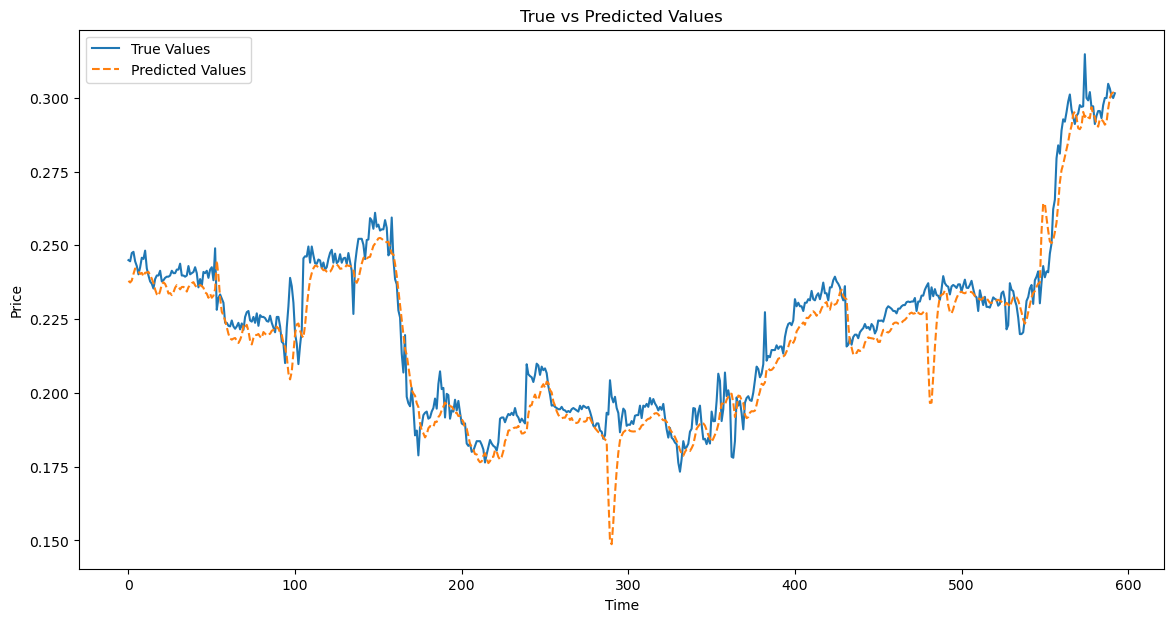

In [290]:
import os
import autokeras as ak
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf

# Assuming X_train, y_train, X_test, y_test are already defined

# Reshape the data if necessary
X_train_reshaped = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2]))
X_test_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2]))

# Define the input node
input_node = ak.Input()

# Define the task node
output_node = ak.RNNBlock()(input_node)
output_node = ak.RegressionHead()(output_node)

# Build the AutoModel
model = ak.AutoModel(
    inputs=input_node,
    outputs=output_node,
    max_trials=30,  # The maximum number of different models to try
    overwrite=True
)

# Use a high number of epochs and early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Fit the scaler on the training data
scaler = MinMaxScaler()
y_train_reshaped = y_train.reshape(-1, 1)
scaler.fit(y_train_reshaped)

# Train the model with early stopping
model.fit(X_train_reshaped, y_train, epochs=500, validation_split=0.2, callbacks=[early_stopping])

# Retrieve the best model
best_model = model.export_model()

# Summary of the best model
best_model.summary()

# Remove existing model file if it exists
if os.path.exists("best_model.keras"):
    os.remove("best_model.keras")

# Save the best model using the native Keras format
best_model.save("best_model.keras")

# Make predictions with the best model
predicted_y = best_model.predict(X_test_reshaped)

# Evaluate the model
evaluation = best_model.evaluate(X_test_reshaped, y_test)
print(f"Best model evaluation: {evaluation}")

# Inverse transform the predicted values and true values to the original scale
y_test_reshaped = y_test.reshape(-1, 1)
y_rescaled = scaler.inverse_transform(y_test_reshaped).squeeze()

predicted_y_reshaped = predicted_y.reshape(-1, 1)
predicted_rescaled = scaler.inverse_transform(predicted_y_reshaped).squeeze()

# Convert to pandas Series for plotting
y_test_series = pd.Series(y_rescaled, name='True Values')
predicted_series = pd.Series(predicted_rescaled, name='Predicted Values')

# Plot the true and predicted values
plt.figure(figsize=(14, 7))
plt.plot(y_test_series, label='True Values')
plt.plot(predicted_series, label='Predicted Values', linestyle='--')
plt.legend()
plt.title('True vs Predicted Values')
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()


In [291]:
## Retrieve the best model
best_model = model.export_model()

# Print a detailed summary of the best model
best_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 72, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cast_to_float32 (CastToFloat32) │ (None, 72, 5)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 72, 5)          │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 5)              │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ regression_head_1 (Dense)       │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 366 (1.43 KB)

 Trainable params: 366 (1.43 KB)

 Non-trainable params: 0 (0.00 B)

In [300]:
optimizer_config = best_model.optimizer.get_config()

# Display the optimizer details
print(optimizer_config)

{'name': 'SGD', 'learning_rate': 0.009999999776482582, 'weight_decay': None, 'clipnorm': None, 'global_clipnorm': None, 'clipvalue': None, 'use_ema': False, 'ema_momentum': 0.99, 'ema_overwrite_frequency': None, 'loss_scale_factor': None, 'gradient_accumulation_steps': None, 'momentum': 0.0, 'nesterov': False}


In [158]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, GRU, Dense
from tensorflow.keras.optimizers import SGD


model = Sequential([
    InputLayer(input_shape=(12, 5)),  
    GRU(256, return_sequences=True),
    Dropout(0.2),
    GRU(256),
    Dropout(0.2),
    Dense(1)
])

optimizer = SGD(learning_rate=0.01, momentum=0.0, nesterov=False)

# Compile the model
model.compile(optimizer=optimizer, loss='mean_squared_error')


model.summary()

/Users/shpetimtafili/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_161"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_70 (GRU)                    │ (None, 12, 256)        │       201,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_258 (Dropout)           │ (None, 12, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_71 (GRU)                    │ (None, 256)            │       394,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_259 (Dropout)           │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 596,993 (2.28 MB)

 Trainable params: 596,993 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

In [159]:
# Early stopping and model checkpointing
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)
checkpointer = ModelCheckpoint(filepath='best_model.keras', save_best_only=True, monitor='val_loss')

# Train the model
GRU_training = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=16,
    validation_data=(X_test, y_test),
    callbacks=[checkpointer, early_stopping],
    verbose=1
)

# Evaluate the model
evaluation = rnn.evaluate(X_test, y_test)
print(f'Final model evaluation: {evaluation}')


Epoch 1/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 52ms/step - loss: 0.0467 - val_loss: 0.0222
Epoch 2/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0063 - val_loss: 0.0053
Epoch 3/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0025 - val_loss: 0.0015
Epoch 4/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0020 - val_loss: 9.2083e-04
Epoch 5/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0018 - val_loss: 9.3214e-04
Epoch 6/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 59ms/step - loss: 0.0015 - val_loss: 7.4591e-04
Epoch 7/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - loss: 0.0017 - val_loss: 7.6398e-04
Epoch 8/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0015 - val_loss: 7.5799e-04
Epoch 9/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.0016 - val_loss: 8.3969e-04
Epoch 10/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 60ms/step - loss: 0.0016 - val_loss: 7.3552e-04
Epoch 11/100
112/112 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - loss: 0.0015 - val_loss: 7.0904e-0

<Axes: title={'center': 'Best Validation RMSE:  2.6028%'}>

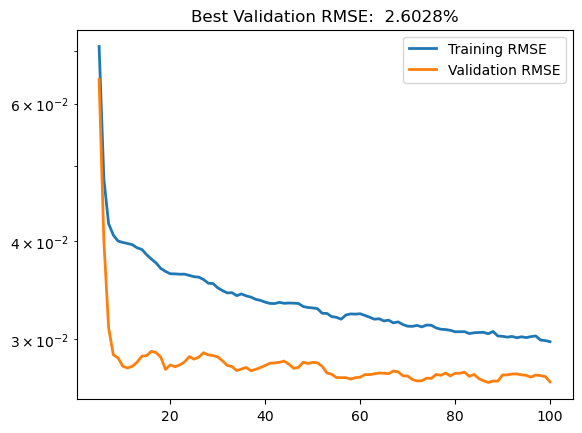

In [160]:
loss_history = pd.DataFrame(GRU_training.history).pow(.5)
loss_history.index += 1
best_rmse = loss_history.val_loss.min()
best_epoch = loss_history.val_loss.idxmin()
loss_history.columns = ['Training RMSE', 'Validation RMSE']
title = f'Best Validation RMSE: {best_rmse: .4%}'
loss_history.rolling(5).mean().plot(logy=True,lw=2,title=title)

In [161]:
test_predict_scaled_GRU = model.predict(X_test)

test_predict_reshaped_GRU = test_predict_scaled_GRU.reshape(-1, 1)
test_predict_rescaled_GRU = scaler.inverse_transform(test_predict_reshaped_GRU).squeeze()
test_predict_series_GRU = pd.Series(test_predict_rescaled_GRU, index=range(len(y_test)))


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step


In [162]:
y_test_reshaped_gru = y_test.reshape(-1, 1)

# Inverse transform y_test to its original scale
y_rescaled_gru = scaler.inverse_transform(y_test_reshaped_gru).squeeze()

# Convert the rescaled y_test to a Pandas Series for easy comparison
y_rescaled_series_gru = pd.Series(y_rescaled_gru, index=range(len(y_test)))

In [98]:
y_test_reshaped_gru

array([[0.10893707],
       [0.11158117],
       [0.11105235],
       [0.11052353],
       [0.12004231],
       [0.12480169],
       [0.11052353],
       [0.10893707],
       [0.10946589],
       [0.10787943],
       [0.06557377],
       [0.07086198],
       [0.06557377],
       [0.05896351],
       [0.05658382],
       [0.05341089],
       [0.05235325],
       [0.06028556],
       [0.05790587],
       [0.0613432 ],
       [0.05499736],
       [0.05344262],
       [0.05817028],
       [0.05446854],
       [0.05658382],
       [0.05235325],
       [0.056055  ],
       [0.05288207],
       [0.0574458 ],
       [0.05817028],
       [0.06557377],
       [0.06556848],
       [0.06557377],
       [0.06292967],
       [0.06292967],
       [0.06292967],
       [0.04865151],
       [0.06160762],
       [0.0586991 ],
       [0.06292967],
       [0.06081438],
       [0.06081438],
       [0.05975674],
       [0.05545214],
       [0.05393971],
       [0.04970915],
       [0.04865151],
       [0.050

In [99]:
y_rescaled_series_gru

0      171.170
1      171.220
2      171.210
3      171.200
4      171.380
        ...   
393    173.700
394    173.530
395    173.660
396    173.655
397    173.600
Length: 398, dtype: float64

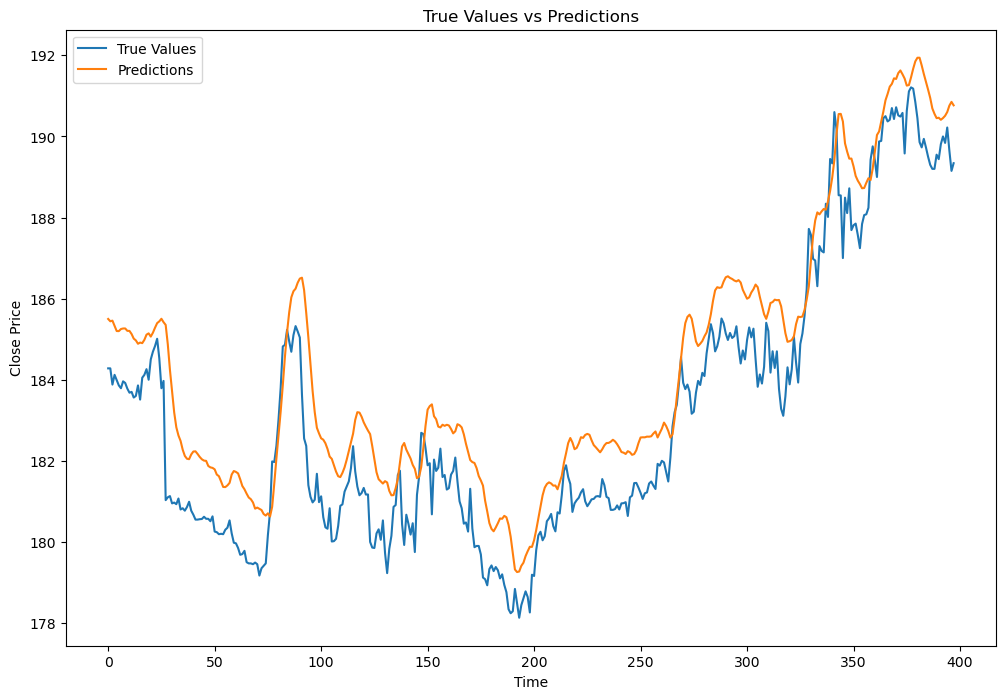

In [163]:
# TRUE VALUE VS PREDICTIONS
plt.figure(figsize=(12, 8))
plt.plot(y_rescaled_series, label='True Values')
plt.plot(test_predict_series, label='Predictions')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.title('True Values vs Predictions')
plt.legend()
plt.show()

In [130]:
### LOOPING GRU
import os
import numpy as np
import tensorflow as tf
import random
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, GRU, Dense, Lambda
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import pandas as pd

# Create the models_GRU directory if it does not exist
if not os.path.exists('models_GRU'):
    os.makedirs('models_GRU')

# Initialize the early stopping and model checkpoint callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

# Dictionary to store RMSE values for each company
rmse_values_GRU = {}

for company in companies:
    
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)
    tf.keras.utils.set_random_seed(seed)
    
    # Fetch the train and test data for the current company
    X_train_GRU = globals()[f'X_train_{company}']
    y_train_GRU = globals()[f'y_train_{company}']
    X_test_GRU = globals()[f'X_test_{company}']
    y_test_GRU = globals()[f'y_test_{company}']
    
    # Define the architecture of the GRU
    number_of_features = X_train_GRU.shape[2]
    rnn_GRU = Sequential([
        InputLayer(input_shape=(12, number_of_features)),
        Lambda(lambda x: tf.cast(x, tf.float32)),
        GRU(256, return_sequences=True),
        GRU(256),
        Dense(1)
    ])
    
    # Compile the model
    optimizer_GRU = SGD(learning_rate=0.01, momentum=0.0, nesterov=False)
    rnn_GRU.compile(optimizer=optimizer_GRU, loss='mean_squared_error')
    
    # Define the model checkpoint callback
    checkpointer_GRU = ModelCheckpoint(filepath=f'models_GRU/model_{company.replace(".", "_").lower()}.keras', 
                                       verbose=1, save_best_only=True, monitor='val_loss')
    
    # Train the model
    GRU_training = rnn_GRU.fit(X_train_GRU, y_train_GRU,
                               epochs=100,
                               batch_size=16,
                               validation_data=(X_test_GRU, y_test_GRU),
                               callbacks=[checkpointer_GRU, early_stopping],
                               verbose=1)
    
    # Evaluate the model
    evaluation_GRU = rnn_GRU.evaluate(X_test_GRU, y_test_GRU)
    print(f'Final model evaluation for {company}: {evaluation_GRU}')
    
    # Store RMSE values
    loss_history_GRU = pd.DataFrame(GRU_training.history).pow(.5)
    rmse_values_GRU[company] = loss_history_GRU

# Print RMSE values for all companies
for company, rmse in rmse_values_GRU.items():
    print(f'{company}: {rmse}')


Epoch 1/100
 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0795
Epoch 1: val_loss improved from inf to 0.05668, saving model to models_GRU/model_aapl_o.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 0.0784 - val_loss: 0.0567
Epoch 2/100
 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0059
Epoch 2: val_loss improved from 0.05668 to 0.02174, saving model to models_GRU/model_aapl_o.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0059 - val_loss: 0.0217
Epoch 3/100
 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 0.0030
Epoch 3: val_loss improved from 0.02174 to 0.00785, saving model to models_GRU/model_aapl_o.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 68ms/step - loss: 0.0030 - val_loss: 0.0078
Epoch 4/100
 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - loss: 0.0018
Epoch 4: val_loss improved from 0.00785 to 0.00272, saving model to models_GRU/model_aapl_o.keras
100/100 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - loss: 0.0018 - val_loss: 0.0027
Epoch 5/100
100/100 ━━━━━━━━━━━━

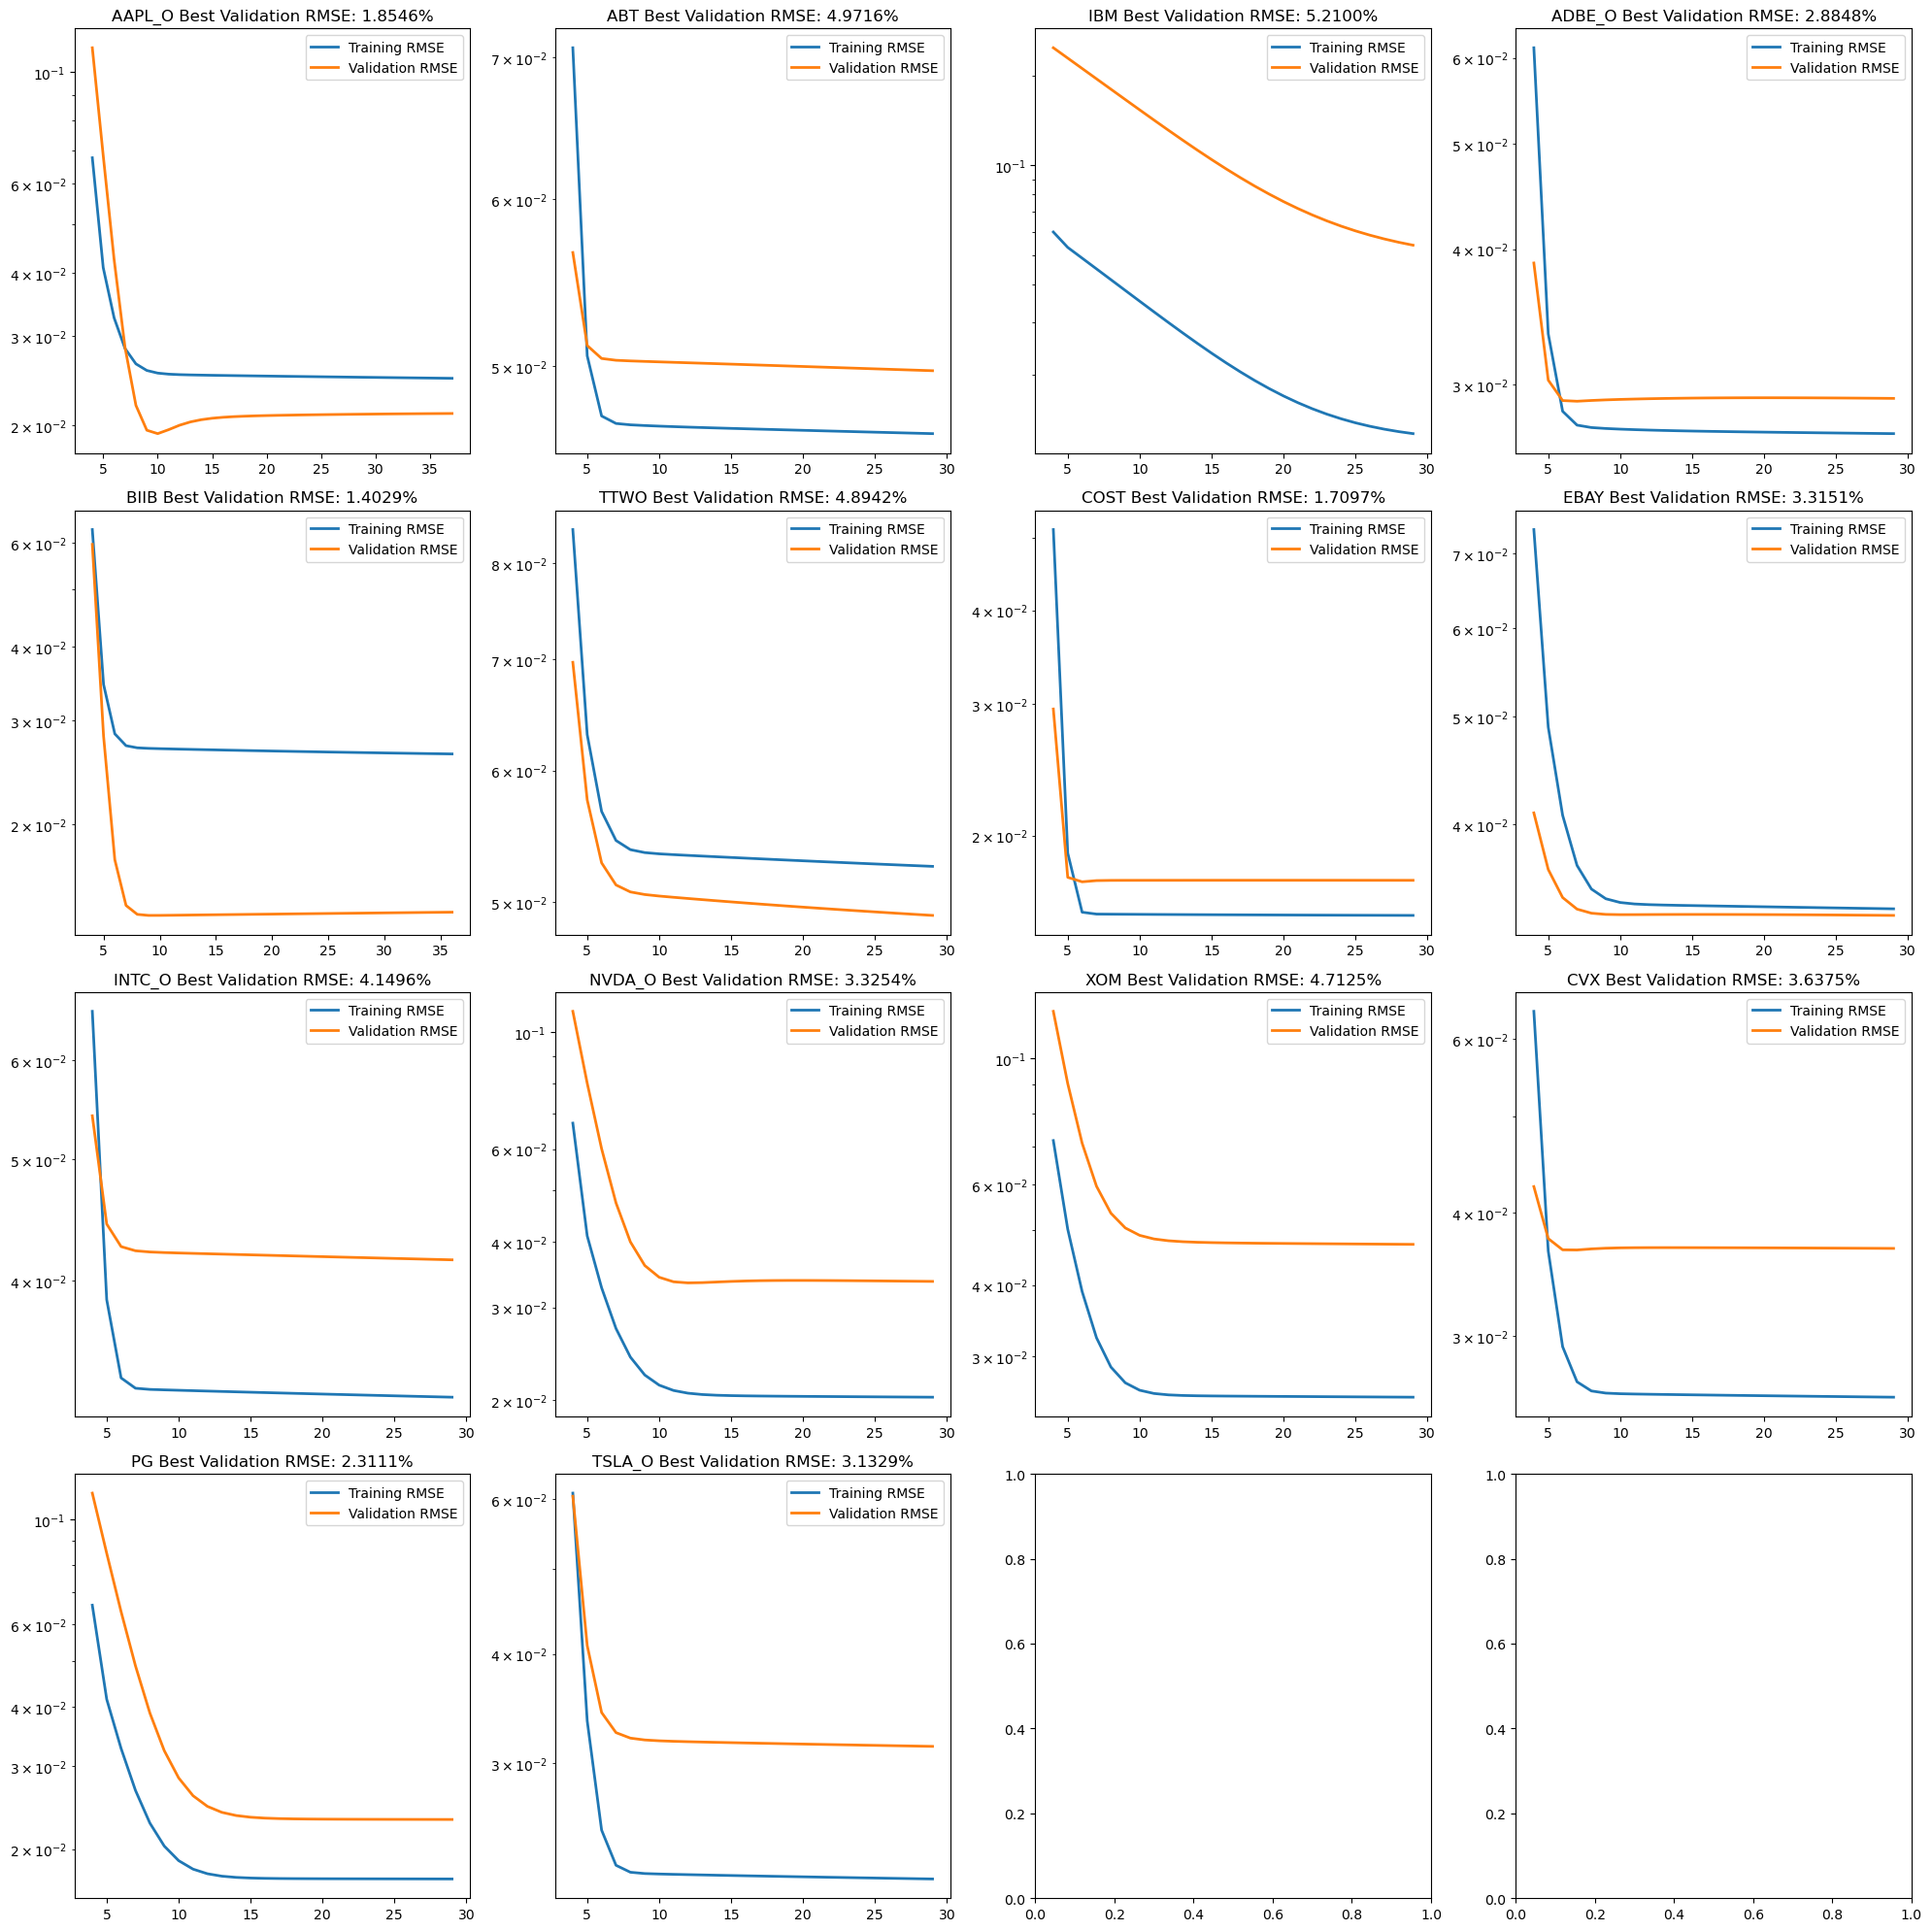

In [133]:
# Plotting RMSE for all companies
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  

for ax, (company, history) in zip(axs.flatten(), rmse_values_GRU.items()):
    best_rmse_GRU = history.val_loss.min()
    best_epoch_GRU = history.val_loss.idxmin()
    title = f'{company.upper()} Best Validation RMSE: {best_rmse_GRU:.4%}'
    
    history.columns = ['Training RMSE', 'Validation RMSE']
    history.rolling(5).mean().plot(logy=True, lw=2, ax=ax, title=title)

plt.tight_layout()
plt.show()

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step


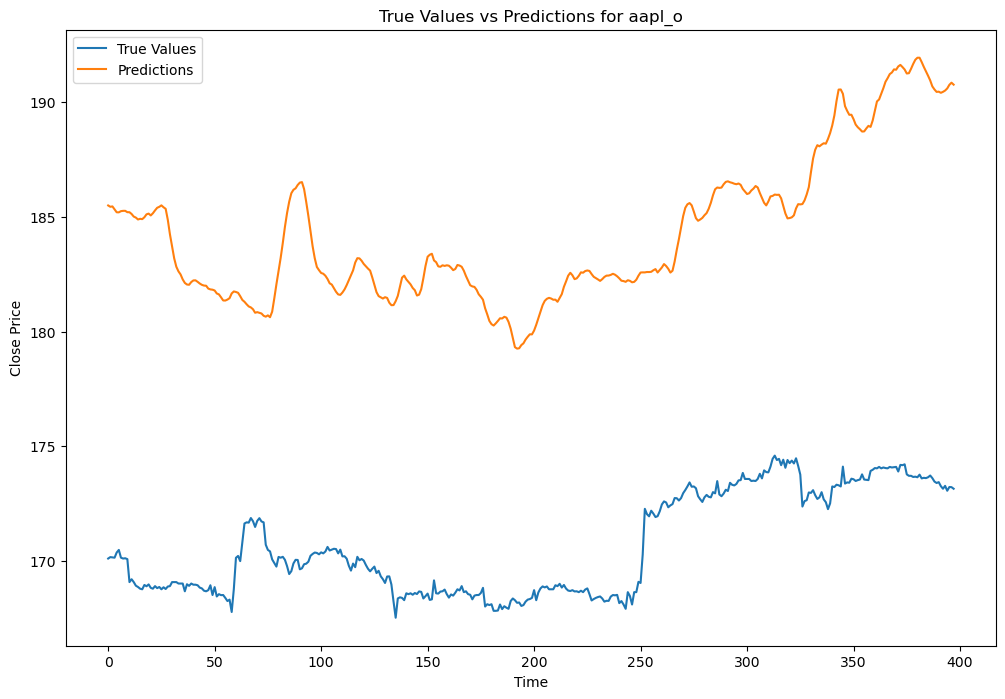

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


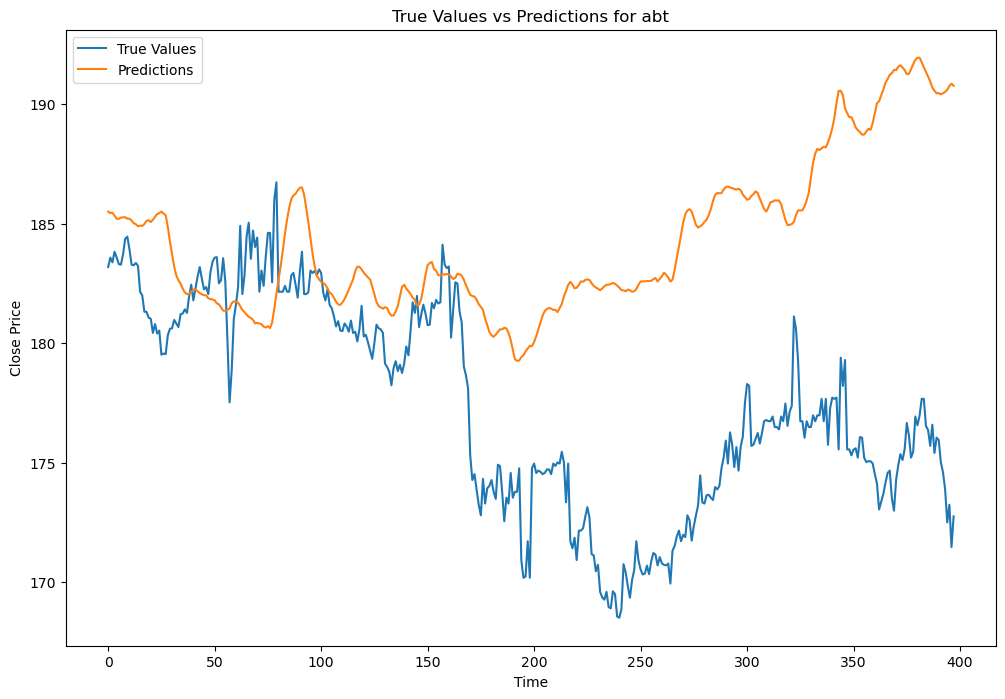

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


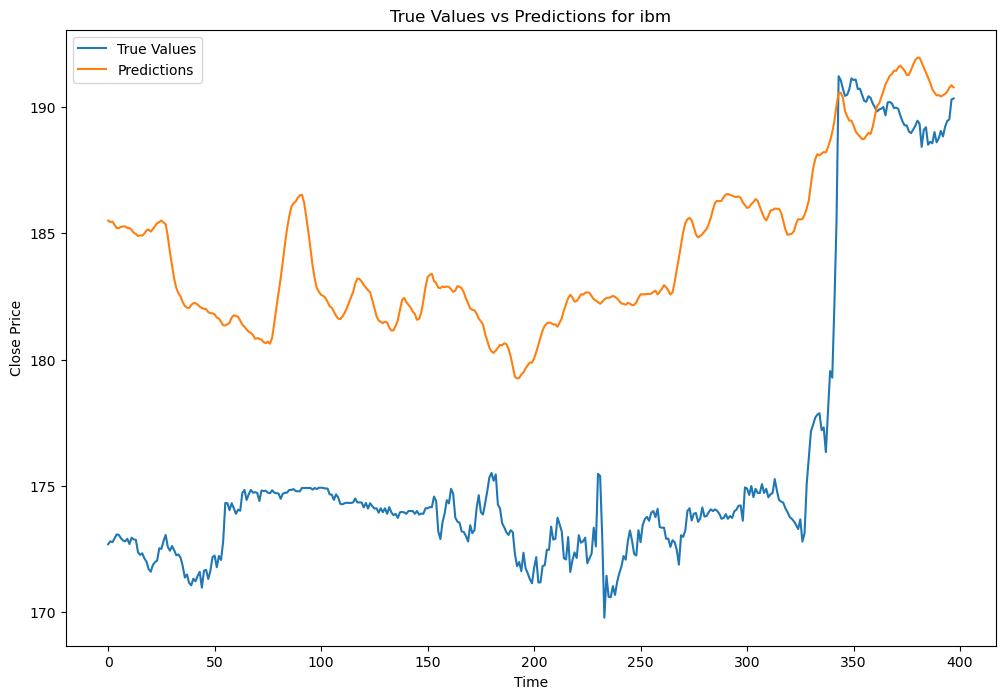

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


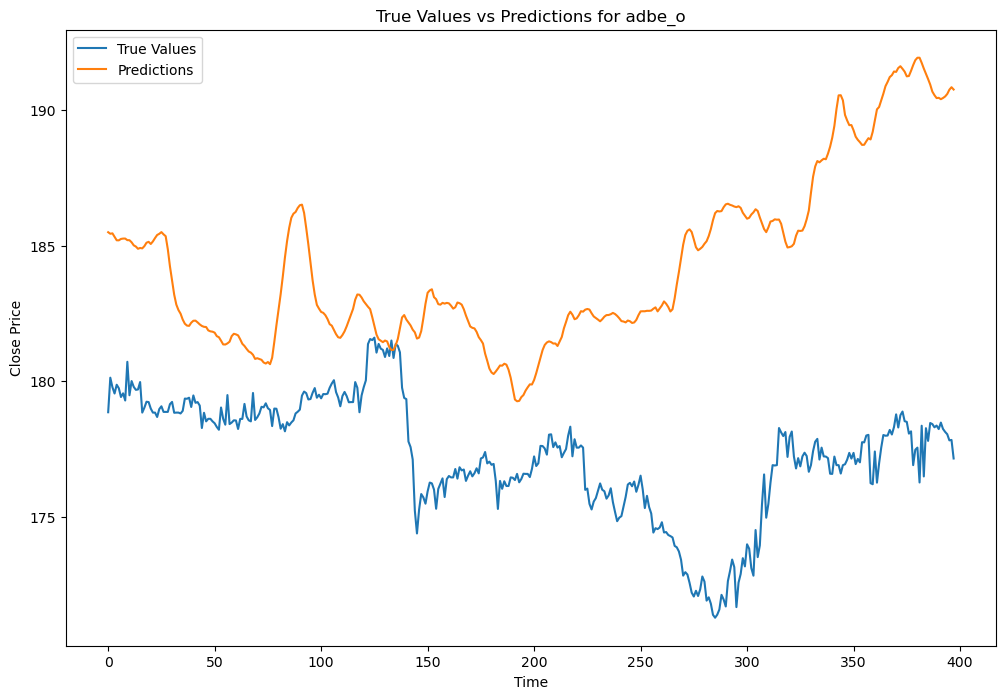

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


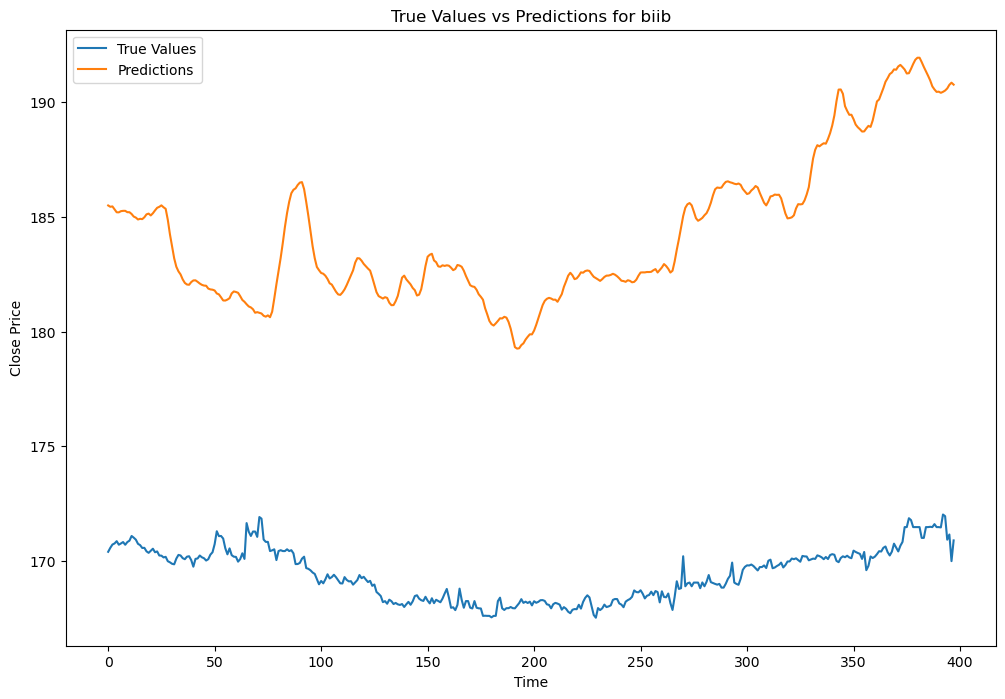

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


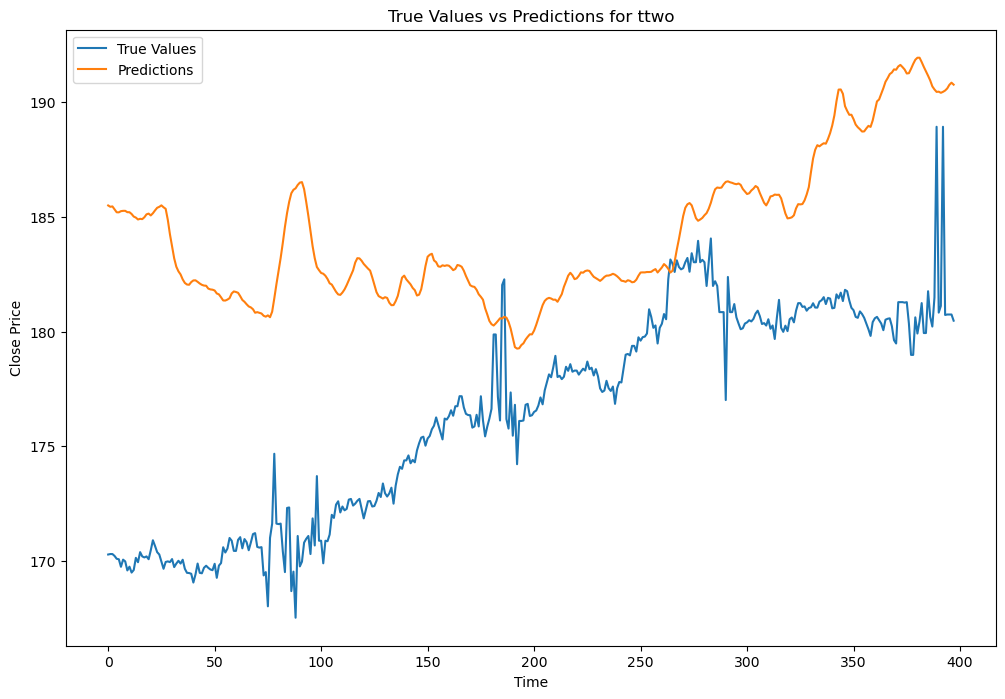

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


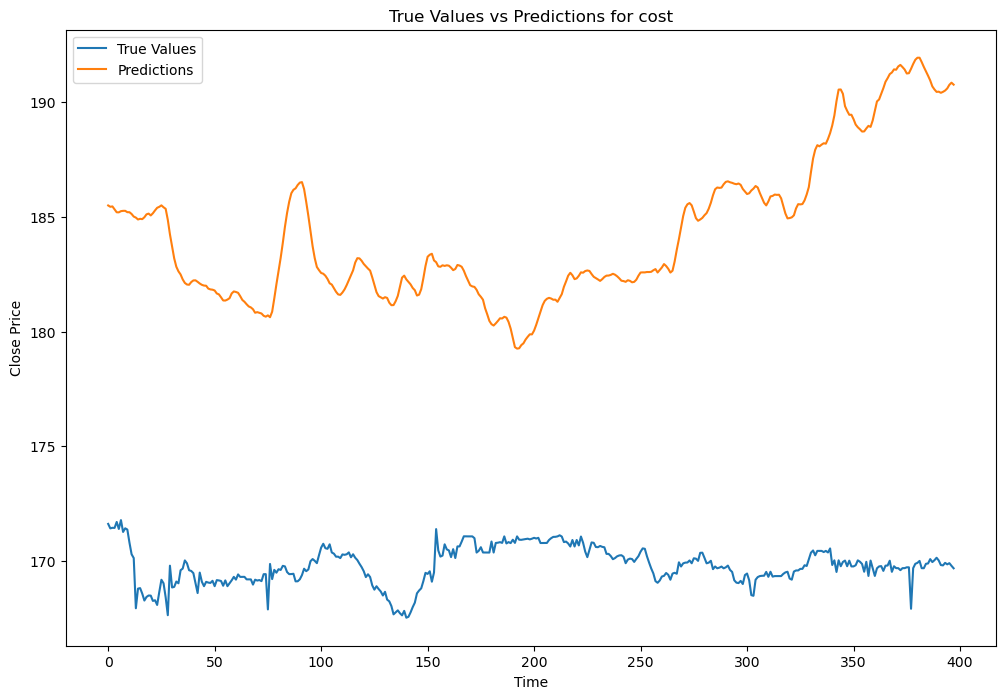

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


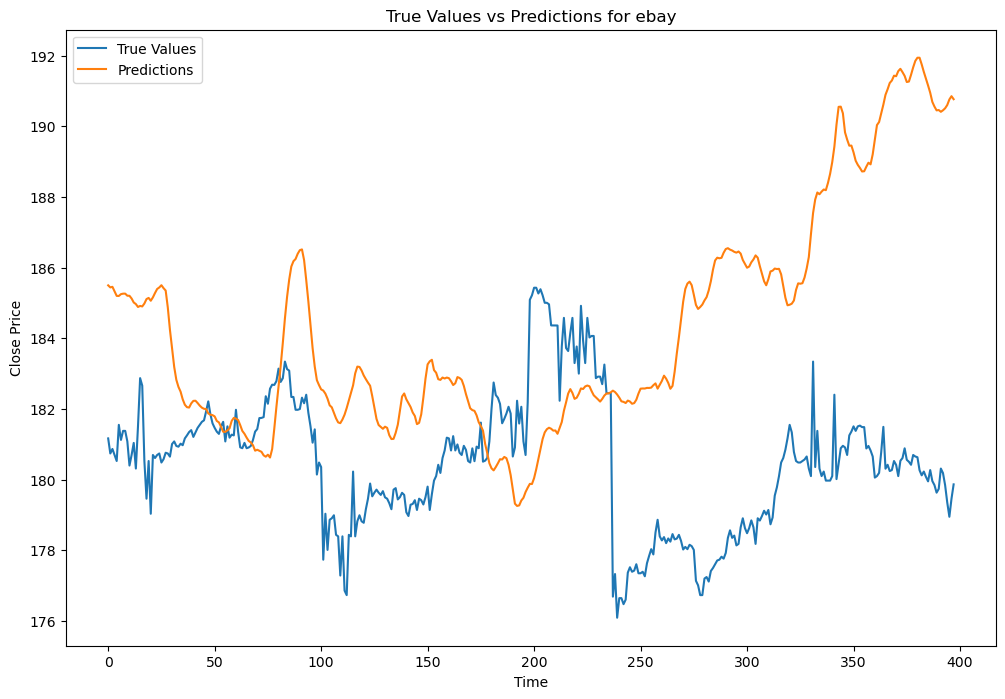

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


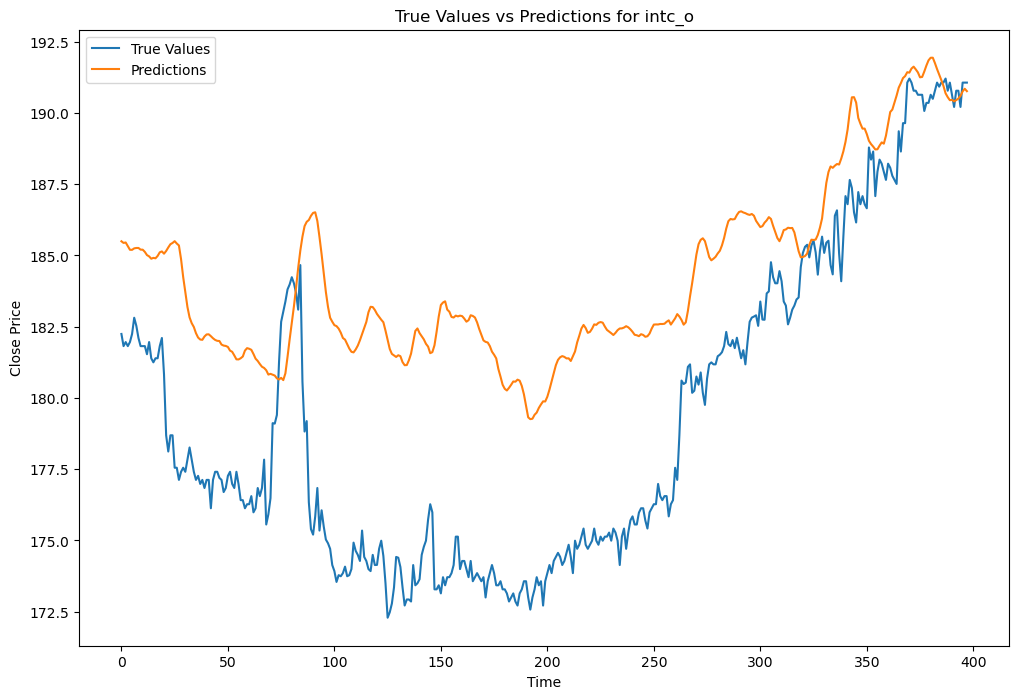

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


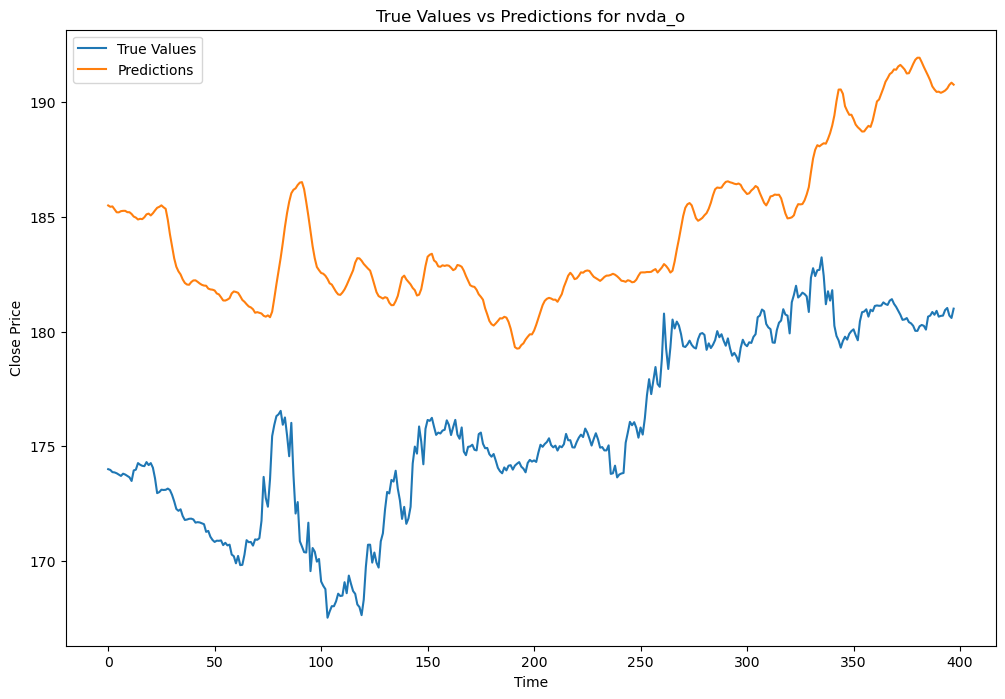

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


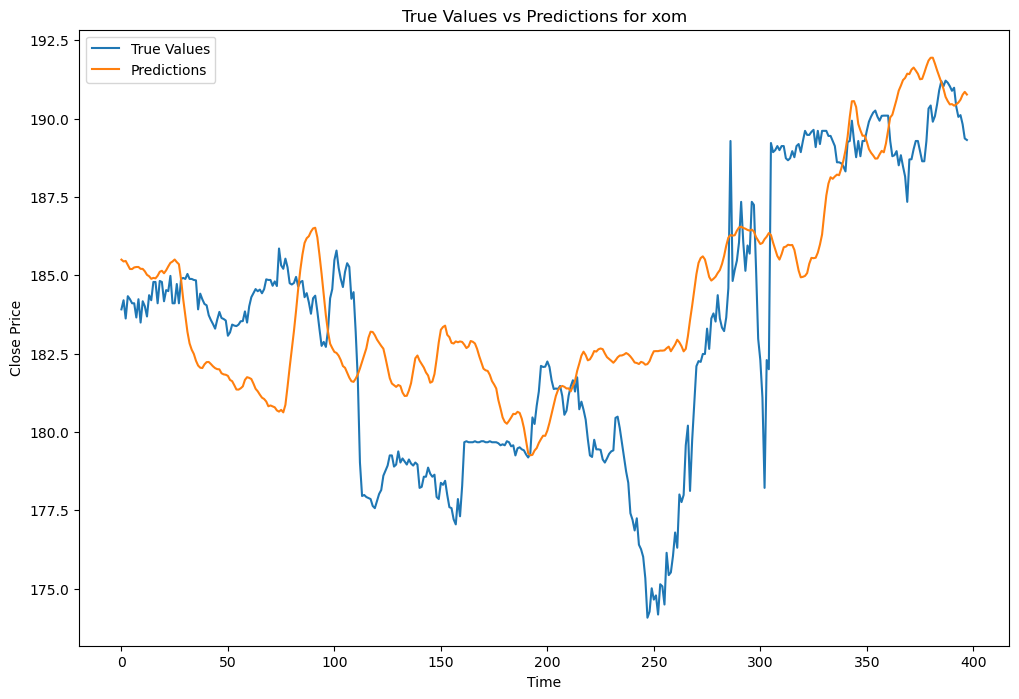

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


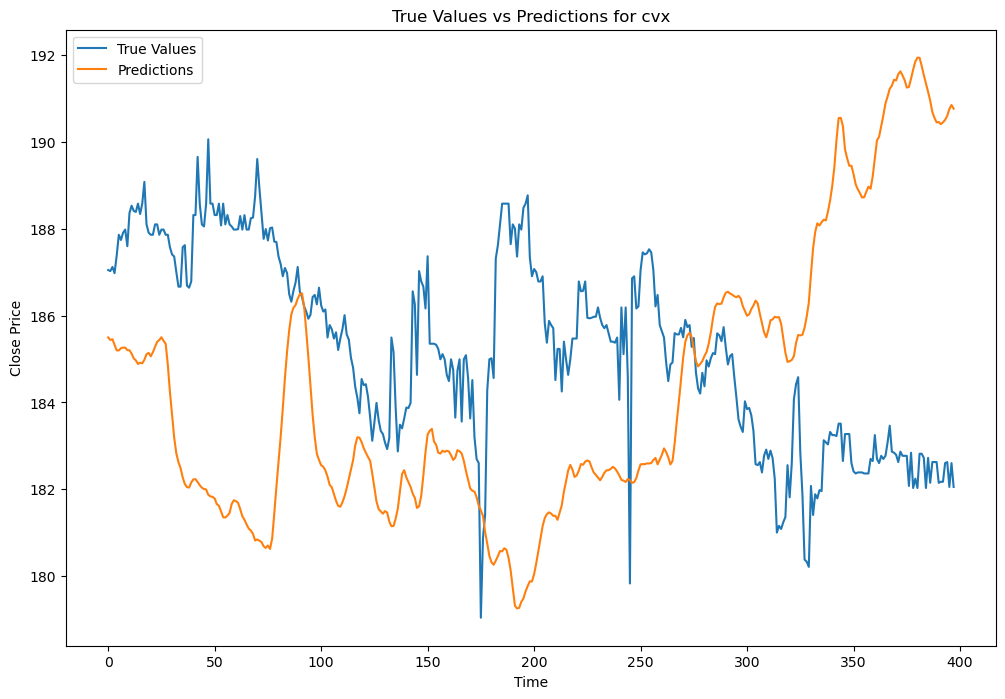

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


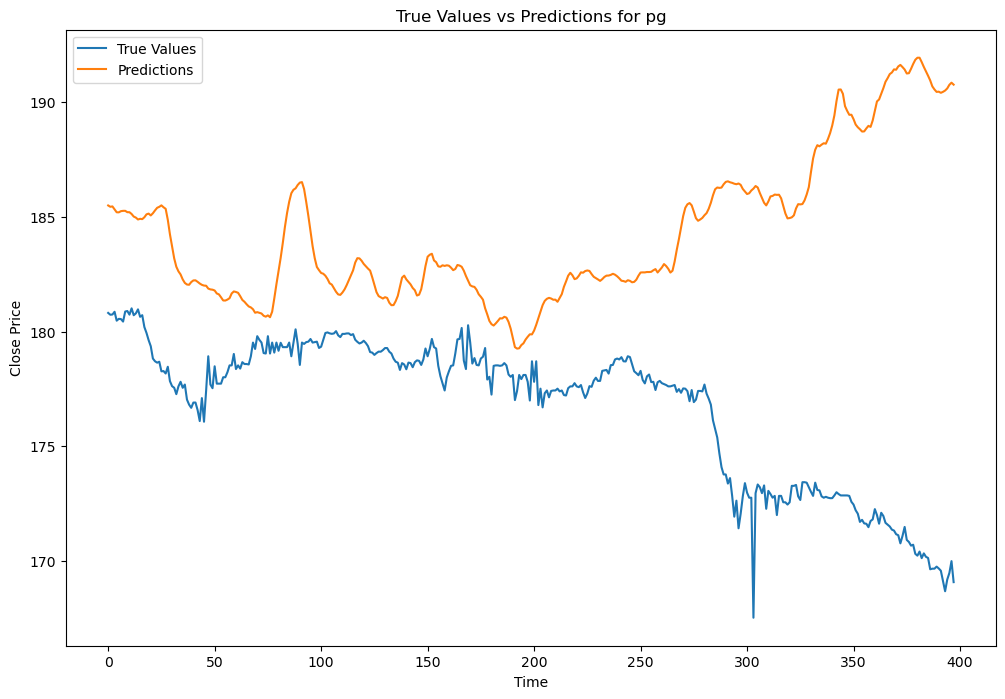

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


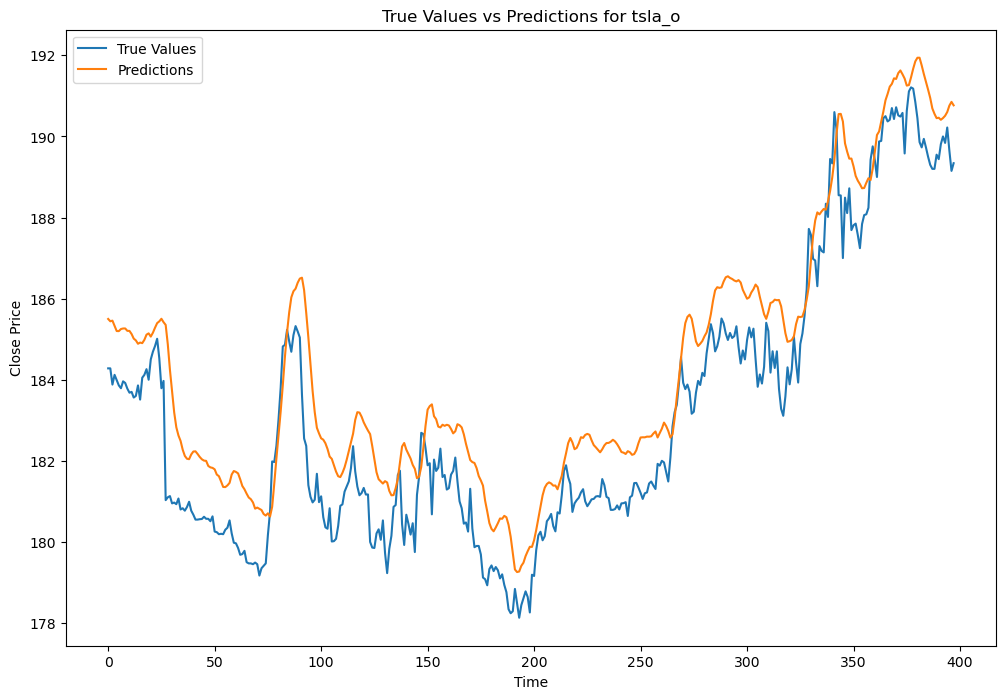

In [134]:
# Define a function to plot true values vs predictions
def plot_predictions(y_test, test_predictions, company_name):
    plt.figure(figsize=(12, 8))
    plt.plot(y_test, label='True Values')
    plt.plot(test_predictions, label='Predictions')
    plt.xlabel('Time')
    plt.ylabel('Close Price')
    plt.title(f'True Values vs Predictions for {company_name}')
    plt.legend()
    plt.show()





# Loop through each company and make predictions
for company in companies:
    # Prepare the variables
    X_test = globals()[f'X_test_{company.replace(".", "_").lower()}']
    y_test = globals()[f'y_test_{company.replace(".", "_").lower()}']
    
    # Make predictions
    test_predict_scaled_GRU = rnn_GRU.predict(X_test)
    
    # Reshape predictions to 2D array for inverse transformation
    test_predict_reshaped_GRU = test_predict_scaled_GRU.reshape(-1, 1)
    # Inverse transform the predictions
    test_predict_rescaled_GRU = scaler.inverse_transform(test_predict_reshaped_GRU).squeeze()
    
    # Convert predictions to a Pandas Series for easy comparison
    test_predict_series_GRU = pd.Series(test_predict_rescaled_GRU, index=range(len(y_test)))
    
    # Reshape y_test to 2D for inverse transformation
    y_test_reshaped = y_test.reshape(-1, 1)
    # Inverse transform y_test to its original scale
    y_rescaled = scaler.inverse_transform(y_test_reshaped).squeeze()
    # Convert y_test to a Pandas Series for easy comparison
    y_rescaled_series = pd.Series(y_rescaled, index=range(len(y_test)))
    
    # Plot the predictions against the true values
    plot_predictions(y_rescaled_series, test_predict_rescaled, company)

Profit: $1483.07
Return on Investment (ROI): 1.48%
Sharpe Ratio: 0.75


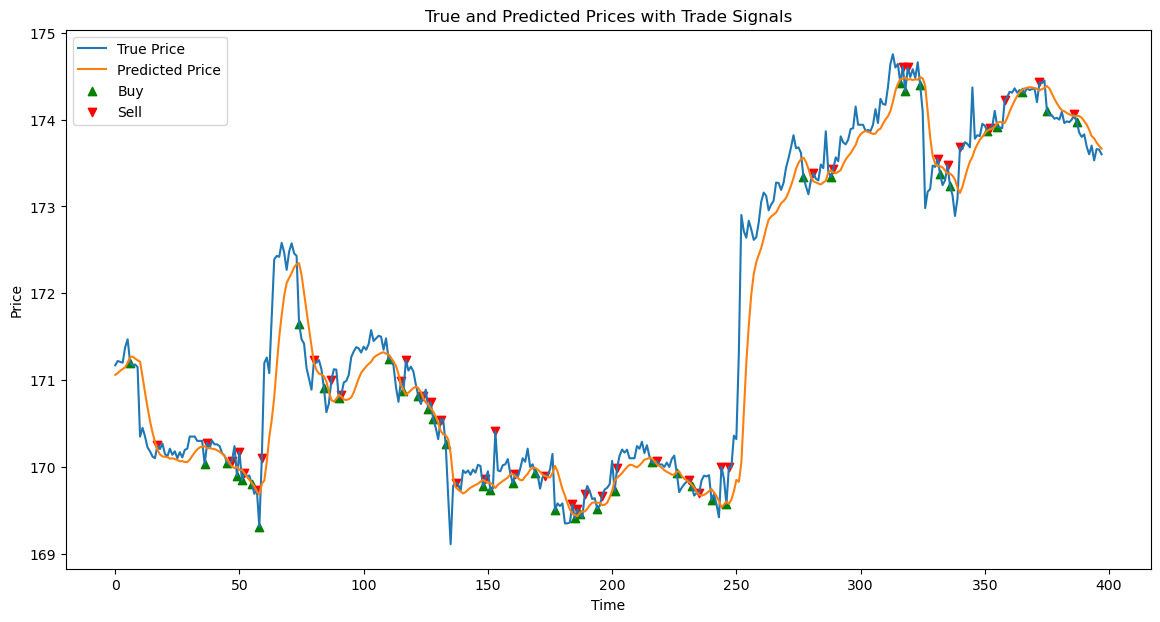

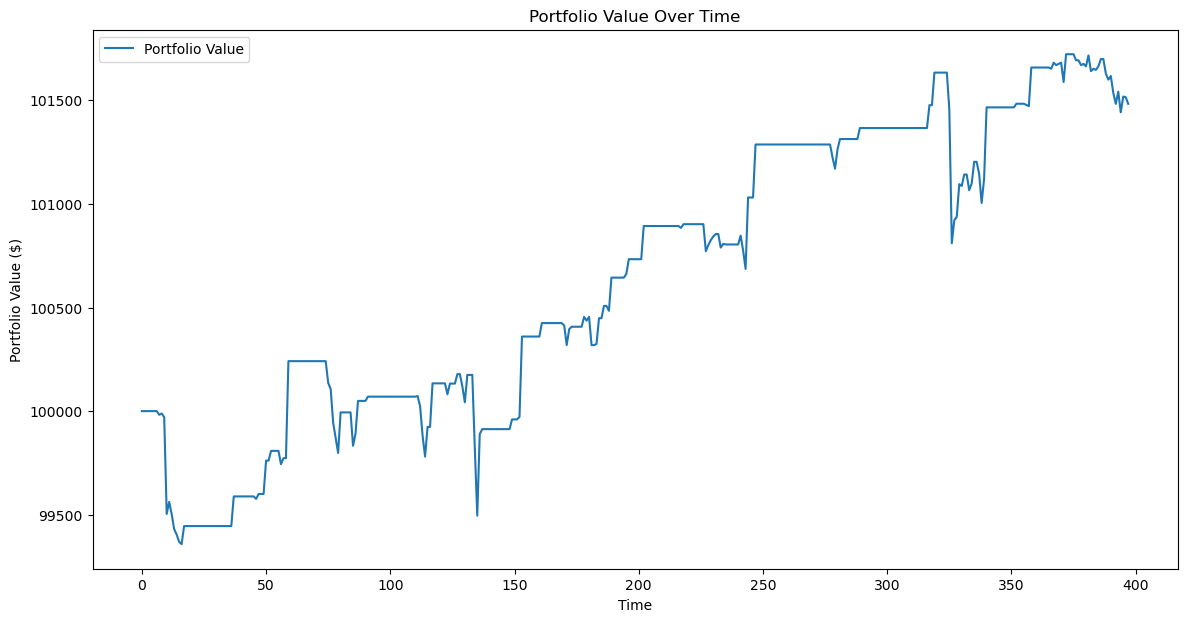

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Initialize variables
initial_cash = 100000  # Starting with $100,000
cash = initial_cash
positions = 0
portfolio_value = []
trades = []

# Define trading rules
def trading_strategy(predicted_price, current_price, positions, cash):
    action = 'hold'
    if predicted_price > current_price and cash > current_price:
        action = 'buy'
    elif predicted_price < current_price and positions > 0:
        action = 'sell'
    return action

# Simulate trading process
for i in range(len(y_rescaled_series_gru)):
    current_price = y_rescaled_series_gru.iloc[i]
    predicted_price = test_predict_series_GRU.iloc[i]

    action = trading_strategy(predicted_price, current_price, positions, cash)

    if action == 'buy':
        positions += cash // current_price
        cash %= current_price
        trades.append((y_rescaled_series_gru.index[i], 'buy', current_price))
    elif action == 'sell':
        cash += positions * current_price
        positions = 0
        trades.append((y_rescaled_series_gru.index[i], 'sell', current_price))

    portfolio_value.append(cash + positions * current_price)

# Convert portfolio value to a pandas Series for easier plotting and analysis
portfolio_value_series = pd.Series(portfolio_value, index=y_rescaled_series_gru.index)

# Calculate performance metrics
final_cash = cash + positions * y_rescaled_series_gru.iloc[-1]
profit = final_cash - initial_cash
roi = (final_cash - initial_cash) / initial_cash * 100
print(f"Profit: ${profit:.2f}")
print(f"Return on Investment (ROI): {roi:.2f}%")

# Calculate Sharpe Ratio
returns = portfolio_value_series.pct_change().dropna()
sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)  # Assuming daily returns
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")

# Plot the portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(y_rescaled_series_gru, label='True Price')
plt.plot(test_predict_series_GRU, label='Predicted Price')

# Mark buy and sell points
for trade in trades:
    if trade[1] == 'buy':
        plt.scatter(trade[0], trade[2], marker='^', color='green', label='Buy')
    elif trade[1] == 'sell':
        plt.scatter(trade[0], trade[2], marker='v', color='red', label='Sell')

# Avoid duplicate labels in legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.xlabel('Time')
plt.ylabel('Price')
plt.title('True and Predicted Prices with Trade Signals')
plt.show()

# Plot the portfolio value over time
plt.figure(figsize=(14, 7))
plt.plot(portfolio_value_series, label='Portfolio Value')
plt.xlabel('Time')
plt.ylabel('Portfolio Value ($)')
plt.title('Portfolio Value Over Time')
plt.legend()
plt.show()


In [191]:
# Access the history of the best trial
best_trial = model.tuner.get_best_trial()
best_trial_epochs = best_trial.hyperparameters.values['epochs']
print(f'Optimal number of epochs: {best_trial_epochs}')


AttributeError: 'Greedy' object has no attribute 'get_best_trial'

In [111]:
 X_train.shape[1]

12